# Health Information Systems and Decision Support Systems
# WPO 4: - CAD Systems (20/03/2020)
***
*Panagiotis Gonidakis, Jakub Ceranka, Pieter Boonen, Jef Vandemeulebrouke*<br>
*Department of Electronics and Informatics (ETRO)*<br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Insert students name and IDs here</font>

### Goal
The goal of this practical session is to get an insight into artificial neural networks and convolutional neural networks. Your tasks will involve examining and preprocessing the data, training various neural networks and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook, the image files representing the necessary graphs and the report in .ipynb and .html format. The grade from this practical session will contribute to your final grade.

You are kindly requested to submit the <b> .ipynb </b>, an exported <b>.html</b> version  with all the cells properly executed and a <b>.zip</b> file containing all the <b>images</b> displaying the tensorboard training/validating curves </b>(in case are not displayed in the .ipynb).

Please use the Canvas or Ufora assignment functionality to upload your reports.

The deadline of the submission is in <b> 09/04/2020, 23:59 pm. </b>.

If you have difficulties submitting your assignment, send it to [jceranka@etrovub.be](mailto:jceranka@etrovub.be) 

Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be)

# Libraries
During this practical session, the following libraries will be used:

* Numpy (np)
* Glob
* Simple ITK (sitk)
* Matplotlib
* Sklearn
* Tensorflow (tf)
* TFLearn / (you can also use keras)

To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using **version** command. 

* If you use your own laptop, you will need to install the two new modules. Otherwise, all the necessary software is already installed at the lab's PCs. 

* These expirements are simplified in order to be run without the need of a powerful GPU. However some training tasks may take 30-40 minutes using a CPU. You can accelerate your expirements if you work on [Google colab](https://colab.research.google.com/) framework where a GPU is offered. Then you need to create a GoogleDrive account and upload all the necessary data (scripts + data). 
For more information look [here](https://colab.research.google.com/) and [here](https://colab.research.google.com/notebooks/gpu.ipynb)

### How to  install TFLearn

TFLearn requires Tensorflow to be installed. For the purpose of this excercise you are promted to install Tensorflow with <b>CPU support only</b>.

* https://www.tensorflow.org/install/ <p>
* https://www.tensorflow.org/install/install_linux  <p>
* https://www.tensorflow.org/install/install_mac  <p>
* https://www.tensorflow.org/install/install_windows  <p>

Then, install TFLearn: 
* http://tflearn.org/installation/

Generally, open the anaconda prompt and then type:
 ```pip install tensorflow``` and after ```pip install tflearn```
 
(*) Keep in mind that recently there is a new version of tensorflow. Depending on the python version you are working you might donwload tensorflow 1 or 2. For python 3.6, tensorflow 2.1.0 is by default is downloaded whereas for python 3.7, tensorflow 1.14.0. It is advised to verify which version it is being used before looking for any documentation as the APIs differ.

(*) Alternally, if you have compatability issues or your are more familiar with keras, you can install [keras](https://keras.io/#installation) which is very similar to tflearn.

# Lung Nodule Analysis 
Lung cancer is the leading cause of cancer-related deaths worldwide. Screening high risk individuals for lung cancer with low-dose CT scans is now being implemented in the United States and other countries are expected to follow soon. In CT lung cancer screening, millions of CT scans will have to be analyzed, which is an enormous burden for radiologists. Therefore, there is a lot of interest in development of computer algorithms to optimize cancer screening.

<img src="images/luna16_image.png">

A vital first step in the analysis of lung cancer CT scans is the detection of pulmonary nodules, which may or may not represent early stage lung cancer. Many Computer-Aided Detection (CAD) systems have already been proposed for this task. 

The LIDC/IDRI data set is publicly available, including the ground-truth annotations of nodules performed by four radiologists.

This practical session is inspired from the challenge [LUNA16](https://luna16.grand-challenge.org/home/), which focused on a large-scale evaluation of automatic nodule detection algorithms on the LIDC/IDRI data set.

<img src="images/lung_cancer1.png">


### Using LIDC/IDRI data set in this practical session

For the needs of this practical session, we will look for an algorithm that only determines the likelihood for a given location in a CT scan to contain a pulmonary nodule. Furthermore, we have included a very small part of the LIDC/IDRI data set and we will use only a slice of suspicious regions of a CT scan.

### Data augmentation

Originally our dataset was very unbalanced. There were a lot samples of non-nodules (negatives) but very few samples of nodules (positives). Machine learning algorithms and specifically neural networks and convolutional neural networks require to be trained on balanced dataset, meaning all the classes should be equally represented in the training set. 

Using data augmentation methods (**rotation and translation**), positive samples were massively augmented in order to balance the two classes (nodules and non-nodules)

### Ground Truth data

Categorical data are variables that contain label values rather than numeric values. In our dataset, a sample can represent a nodule or a non-nodule area, so initially we have our ground truth data in a categorical form. Many machine learning algorithms cannot operate on label data directly. They require all input variables to be numeric. This means that categorical data must be converted to a numerical form. This involves two steps:
1. Integer Encoding
2. One-Hot Encoding.

As a first step, each unique category value is assigned an integer value. That's why in our dataset, a sample which represents a nodule will have as a label **1** and a sample which represents a non-nodule area will have as a label **0**.

For our case, this enconding step would be enough since we have only two categories. However, in a more general problem with more than two classes, using this encoding allows the model to assume a natural ordering between categories which may result in poor performance or unexpected results. That's why, one hot encoding can be appled to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. 

Therefore, a  nodule will be represented by the binary variable [1,0] and a non-nodule area by the binary variable [0,1].

<img src="images/lung_cancer2.png">


# Part 1: Visualize, load and prepare data for Machine Learning Algorithms

CT images are stored in MetaImage (mhd/raw) format. Each .mhd file is stored with as a header file (.mhd) and a corresponding pixeldata file (.raw). To load a CT image, just **load the .mhd header file** and data from the binary .raw file will be automatically loaded.

If you look carefully at the name of each .mhd file, you can extract useful information for a specific sample. You can identify its **number id**, its **size**, if the image was produced by a **data augmentation** method and if it contains a **nodule or not**.

For example: *20046_x0y0z0_20x20x6_r0_1.mhd*
* **20046**:   number of candidate patch
* **x0y0z0**: no translation in any axis (if augmentation is used it is mentioned by the angle in the corresponding axis)
* **20x20x6**: size of the image in voxels
* **r0**:     no rotation
* **1**:      it is a positive sample - represents a nodule
* **.mhd**:   it is a mhd file (this is the file which can be loaded)

### Task 1: Import necessary libraries

Load all necessary libraries using the **import** statement and check for errors.

In [1]:
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib
%matplotlib inline
import glob # glob
import tensorflow as tf # tensor flow
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten # Keras
import SimpleITK as sitk # Simple ITK
import os
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

### Task 2: Inspect the dataset

1. Using SimpleITK, create a function to load .mhd files (__Tip:__ The function should return a numpy array - sitk.GetArrayFromImage( ) )
2. Visualize the 6 slices of a chosen patch using matplotlib subplot figure and mention if it is a positive or a negative patch.
3. Visualize some augmented samples from the same candidate region using matplotlib subplot of the same patch and mention the augmentation method. Check visually if the observed patch was modified using the same augmentation method that is mentioned in the samples' filename.
4. Count your files. How many positives and negatives there are in this dataset? (__Tip:__ Use glob library to get the number of specific files in your dataset)

Here we will define a function called "loadImage" that will load an image and return a numpy array, after that we will define a function called "showImage" that will display all 6 slices of the image. Given the case we want to load and show at the same time we declare a function "load_and_save"

In [2]:
def loadImage(filename):
    image = sitk.ReadImage(filename)
    return sitk.GetArrayFromImage(image)

def showImage(image):
    print(image.shape)
    fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(2, 3,figsize=(15, 15))
    ax1.imshow(image[0], cmap=plt.cm.Greys_r)
    ax1.set_title("1")
    
    ax2.imshow(image[1], cmap=plt.cm.Greys_r)
    ax2.set_title("2")
    
    ax3.imshow(image[2], cmap=plt.cm.Greys_r)
    ax3.set_title("3")
    
    ax4.imshow(image[3], cmap=plt.cm.Greys_r)
    ax4.set_title("4")
    
    ax5.imshow(image[4], cmap=plt.cm.Greys_r)
    ax5.set_title("5")
    
    ax6.imshow(image[5], cmap=plt.cm.Greys_r)
    ax6.set_title("6")

def show_single_image(image, title_image = ""):
    plt.title(title_image)
    plt.imshow(image, cmap=plt.cm.Greys_r)
    plt.show()
    

def load_and_show_image(test_path,filename):
    image_path = test_path+"/"+filename
    image = loadImage(image_path)
    showImage(image)
    
def get_prediction_string(prediction):
    return "positive" if prediction == 0 else "negative"

def plot_arrays(arr1,arr2,label_arr1="",label_arr2="", title="", y_title="Loss", x_title="Epoch"):
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.plot(arr1, 'b',label=label_arr1)
    plt.plot(arr2, 'r',label=label_arr2)
    plt.legend(loc='upper right')
    plt.show()  

In [3]:
test_path = "MiniLunaDataset3" # Declare test path where all images are located

In this part we will load a patch that is negative sample with no rotation

(6, 20, 20)


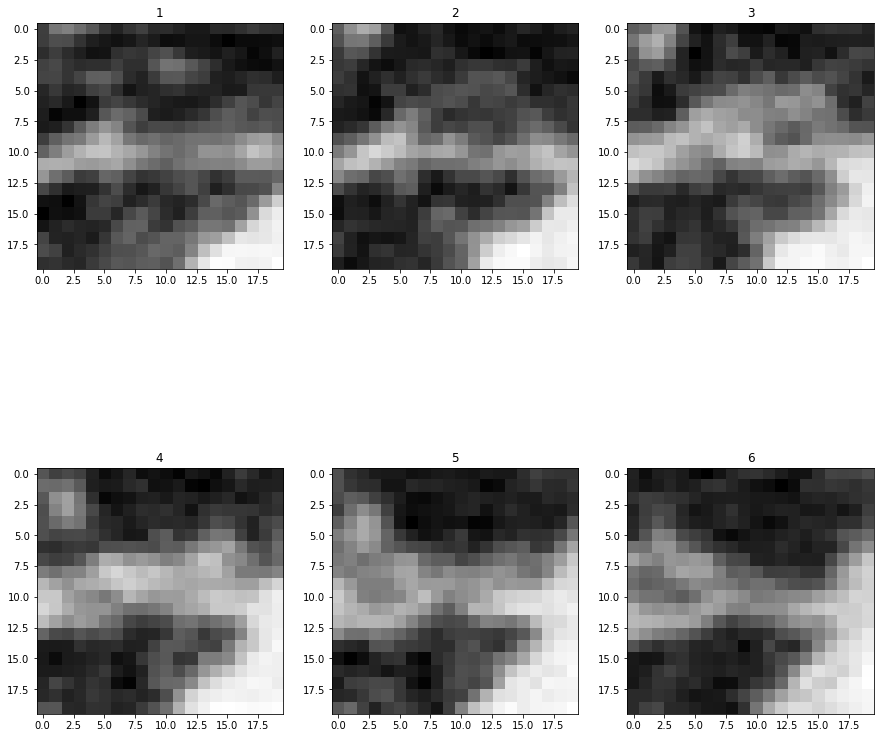

In [4]:
image = "18998_x0y0z0_20x20x6_r0_0.mhd"
load_and_show_image(test_path,image)

Now we will load a positive sample with no rotation and no augmentation

(6, 20, 20)


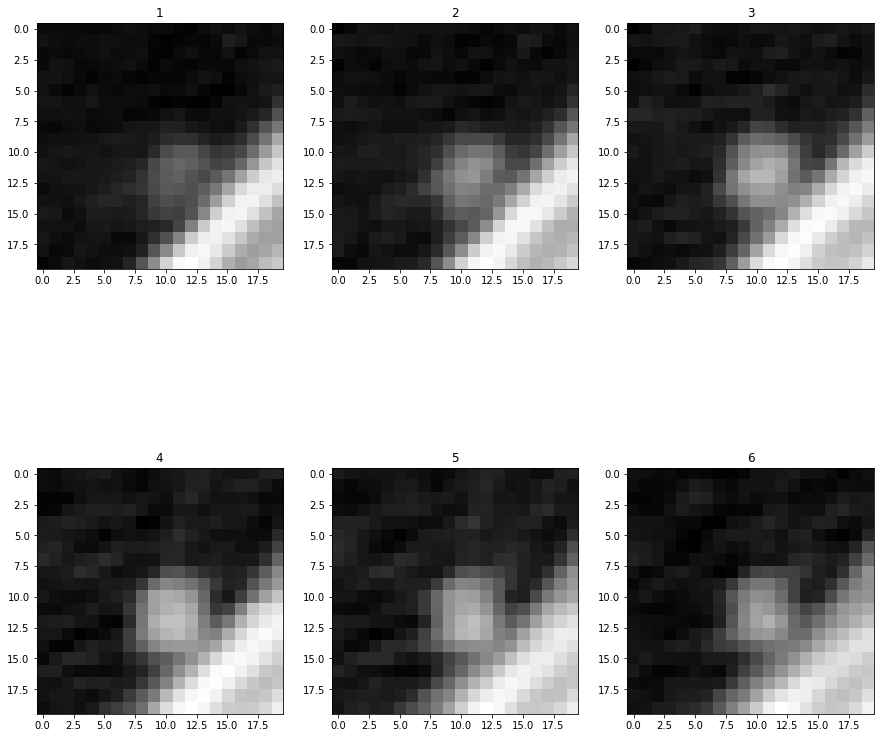

In [5]:
image_positive = "20046_x0y0z0_20x20x6_r0_1.mhd"
load_and_show_image(test_path,image_positive)

Now we will load a positive sample with no rotation and augmentation in x axis

(6, 20, 20)


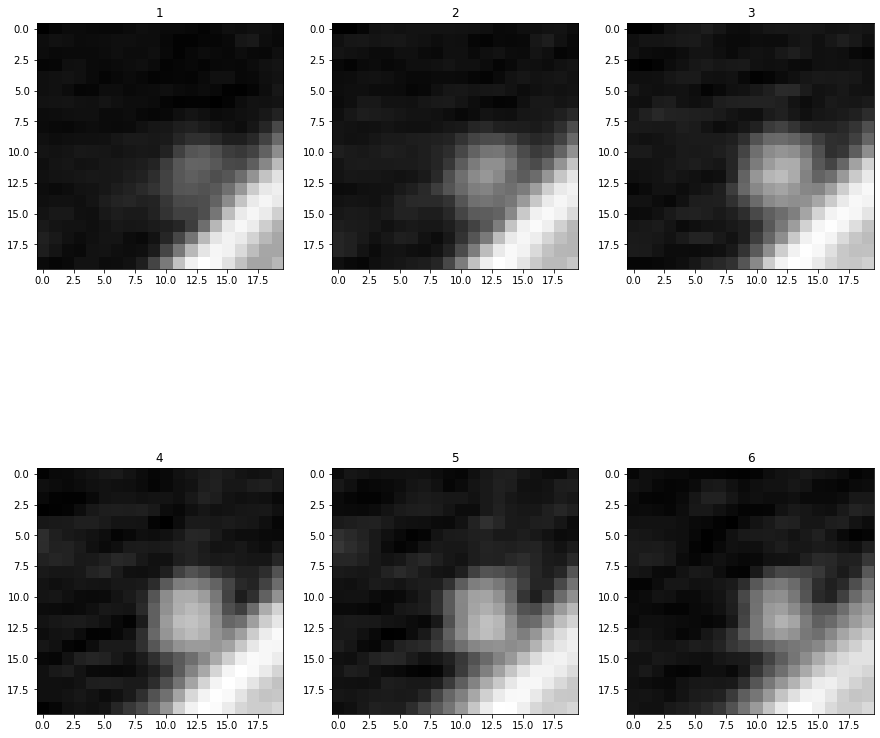

In [6]:
image_positive_augmentation_x = "20046_x-1y0z0_20x20x6_r0_1.mhd"
load_and_show_image(test_path,image_positive_augmentation_x)

Now we will count all the samples of our dataset

In [7]:
data_set = glob.glob(test_path+"/"+'*.mhd')
len(data_set)

2315

Positive samples

In [8]:
positive_samples = glob.glob(test_path+"/"+'*1.mhd')
print(len(positive_samples))

1101


Negative samples

In [9]:
negative_samples = glob.glob(test_path+"/"+'*0.mhd')
print(len(negative_samples))

1214


Total samples

In [10]:
len(positive_samples) + len(negative_samples)

2315

### Task 3: Data pre-processing
In order to use neural-networks, we need to pre-process the data and store it in a way which can be easily interpreted by tensorflow.

First of all, separate the test set from the train set. Keep 10% of your samples as a test-set. (**Tip:** Use sklearn **train_test_split** function.)

Since 3D CNNs need a lot of computation power, we will convert our problem to 2D. Instead of using all the 6 CT slices, we will use only the 3rd CT slice. Therefore, from each sample, the 3rd slice wiil be extracted and further preprocessed. In addition, our values currently range from -1024 HU to around 2000 HU. Anything above 400 is not interesting to us, as these are simply bones with different radiodensity. A commonly used set of thresholds to normalize between is -1000 and 400. Finally the labels will be properly encoded to be used for training and testing.

Write your pre-processing tasks as python functions (listed below) and in the end create a pipeline for each sample which will be also implemented as a function.
1. Function loading the .mhd image as a numpy array.
2. Function extracting the 3rd slice of a patch. The final form of patches should be a numpy array of size **20x20** pixels.
3. Function normalizing the dataset.
The unit of measurement in CT scans is the **Hounsfield Unit (HU)**, which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia:
<img src="images/HU_CTscannersCalibration.png">

    Create a function which is going to normalize the samples according to this table 
        * Create numpy arrays 
        * Normalize between [-1000, 400] using this normalization method 
    $npzarray = (npzarray - minHU) / (maxHU - minHU)$ <br>
         where minHU = -1000 and maxHU = 400
        * After this normalization set any values bigger than 1 to 1 and any values smaller than 0 to 0. 

4. If statement creating **1-hot** labels as a ground truth data in order to train the neural networks. (One-hot labels: [0,1] --> negative, [1,0]--> positive)
 
5. Store into .npy data binary files. (__Tip:__ Use np.save to store data.)


The pipeline should execute the functions as follows: <br>
Load mhd using sitk -> normalize -> Extract 3rd slice -> Label 

and return:
* data:  [sample_idx,20,20]
* labels: [sample_idx,2]

Data pre-processing should be done for both: train and test set.

First of all, separate the test set from the train set. Keep 10% of your samples as a test-set.

In [11]:
X_train, X_test = train_test_split(data_set, test_size=0.1, random_state=42)

<b>1.- Function loading the .mhd image as a numpy array.</b>

This function is already defined (loadImage)

<b>2.- Function extracting the 3rd slice of a patch. The final form of patches should be a numpy array of size 20x20 pixels.</b>

In [12]:
def get_patch_slice(image,sl):
    slice_patch = image[sl]
    return slice_patch

<b> 3.- Function normalizing the dataset. The unit of measurement in CT scans is the Hounsfield Unit (HU), which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this </b>

In [13]:
def normalize(image,minHU = -1000,maxHU = 400):
    npzarray = (image - minHU) / (maxHU - minHU)
    return npzarray

<b>4.- If statement creating 1-hot labels as a ground truth data in order to train the neural networks. (One-hot labels: [0,1] --> negative, [1,0]--> positive)</b>

In [14]:
def get_features(image_name):
    return image_name.split("_")

In [15]:
def get_label(image_name):
    features = get_features(image_name)
    return [0,1] if int(features[4][0]) == 0 else [1,0]

In [16]:
def get_data(data_set):
    data = []
    labels = []
    for image_name in data_set:
        image = loadImage(image_name)
        image = normalize(image)
        image = get_patch_slice(image,2) # get third slice
        data.append(image)
        label = get_label(image_name)
        labels.append(label)
    return np.array(data), np.array(labels)    

In [17]:
def save_dataset(train,labels,identifier=""):
    np.save("{0}_data_generated".format(identifier),train)
    np.save("{0}_labels_generated".format(identifier),labels)

Now se can save the datasets

In [18]:
train_data, train_labels = get_data(X_train)
test_data, test_labels = get_data(X_test)
save_dataset(train_data,train_labels,"train")
save_dataset(test_data,test_labels,"test")

In [19]:
print(train_data.shape)
print(train_labels.shape)

(2083, 20, 20)
(2083, 2)


In [20]:
train = np.load("train_data_generated.npy")
print(train.shape)
label = np.load("train_labels_generated.npy")
print(label.shape)

(2083, 20, 20)
(2083, 2)


In case you are not able to complete part 1, you can move to part 2 of the session by loading the provided .npy files. In that case you will **not** get any credits for Part 1.

# Part 2: Model training and validation

### Using TFLearn - A High Level API for Tensorflow

TFLearn introduces a High-Level API that makes neural network building and training fast and easy. This API is intuitive and fully compatible with Tensorflow.

Have a look at the following links for more information about TFLearn: <br>
http://tflearn.org/getting_started/ <p>
http://tflearn.org/tutorials/quickstart.html <p>
http://tflearn.org/models/dnn/ <p>

When you install TensorFlow, you automatically also install <b>Tensorboard</b>. During or after training you can use  it  to visualize the network and its performance. For the next tasks, <b>include both the loss and the accuracy graphs for training and also for evaluating the test-set</b>. A simple way to attach these graphs to jupyter notebook is to use Window's Snipping Tool or a similar application. Then display it either using a plain HTML ```<img src>``` or by using ```IPython.display.Image``` and ```IPython.core.display.HTML```. Don't forget to submit the actual image file with your .ipynb as the image is not saved in the notebook, it is just linked.

### Some Tips:

* Use ```np.load``` to load your data from the previously created .npy binary files.
* Use ```reshape``` method when it is needed to import data to the network.
* Make your own function to create the model for each network architecture to avoid any model conflicts.
* To define a model:
```python
 network = ...(some layers) ...
 
 network = regression(network, optimizer='...', loss='...')
 modelname = DNN(network) 
```
* Use the model's method <b>fit</b> to train your network:
```python
 modelname.fit(X,Y)
```

* Use the model's method <b>save</b> to save your trained model:
```python
 modelname.save('modelname.tflearn')
```


* Use the model's methods <b>load</b> to load a model from a previous python session.
```python
 modelname.load('modelname.tflearn') 
```

* If you trained a model in a past python session, you can load the trained model but first you have to <b>define and initialize it again</b>. 
```python
 network = ...
 
 modelname.DNN(network)    
 modelname.load('modelname.tflearn')
 modelname.predict(X)
```


* Define the directory to store the tensorboard log files by adding it as a parameter when initializing the model.
```python
 tflearn.models.dnn.DNN (network, clip_gradients=5.0, tensorboard_verbose=0, 
 tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)
```
* Use <b>Tensorbaord</b> to visualize network and performance:
Open the command prompt or the anaconda prompt (or a terminal for linux/iOS) and in the working directory type:
``` $ tensorboard --logdir='...' ```
* You may need to add tensorboard's script to your SYSTEM'S PATH to be able to launch it. 
* Use model's method <b>predict</b> to evaluate a test sample. 
```python 
modelname.predict(X) ```

* <b>If you are using the tensorflow 2 it is possible to run tensorboad using the jupyter notebook. </b>
In a jupyter cell type: ``` %tensorboard --logdir logs ```.
For more information look [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)

* If you have strange tflearn errors, restart the python kernel and <b> re-run only the cells concerning your task you currently work (i.e. run the cells concerning only the current tfmodel). Sometimes you cannot load two different tfmodels at the same python session.</b>.

(*) Depending the version of tflearn/tensorflow you are working some commands might differ. Please look online for recent documentation.

### Some Tensorboard examples.
Here are some examples of a training session. After each task, expand accuracy and loss graphs and attach them in the next cell of the notebook like we did in this exmple.

<img src="screenshots_tensorboard/all_graphs.png">
<img src="screenshots_tensorboard/accuracy_graph.png">
<img src="screenshots_tensorboard/loss_graph.png">

For this task, we will use Keras instead of tflearn

### Task 1: Load Data from the numpy binary files (from Part 1)
Use the numpy load function to load the data created in the previous part of the exercise. The data has to be reshaped in a specific way (see code below) in order to be compatible with the tflearn neural network input standard. After the data is successfully loaded, plot any patch and its ground truth as image title to verify that data is correctly represented.

We define a function that will give us a dataset along with the labels

In [21]:
def load_datasets(dataset,label):
    return np.load(dataset), np.load(label)

We retreive the training and testing datasets and declare a constant for the image size

In [22]:
train_data, train_labels = load_datasets("train_data_generated.npy","train_labels_generated.npy")
test_data, test_labels = load_datasets("test_data_generated.npy","test_labels_generated.npy")
IMG_SIZE = 20

To test that the dataset is correct, we can plot an image along with its ground truth

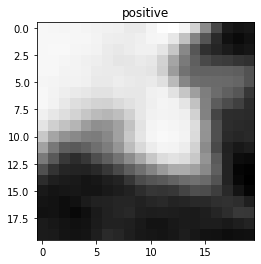

In [23]:
chosen = 4
image_for_prediciton = train_data[chosen]
label = train_labels[chosen]
pred = get_prediction_string(np.argmax(label))
show_single_image(image_for_prediciton, pred)

We define two methods to retreive the datasets for traditional neural networks and convolutional neural networks. The reason we do this is beacuse the input is different depending on the type of neural network. In the first case the input will be 400 neurons representing each pixel of the image. Whereas in the second case (cnn) the input is a grayscale image (20,20,1)

In [24]:
def get_train_data_simple_nn():
    return train_data.reshape((-1, IMG_SIZE * IMG_SIZE)), train_labels
def get_train_data_cnn():
    return train_data.reshape(-1,IMG_SIZE,IMG_SIZE,1), train_labels

In [25]:
def get_test_data_simple_nn():
    return test_data.reshape((-1, IMG_SIZE * IMG_SIZE)), test_labels
def get_test_data_cnn():
    return test_data.reshape(-1,IMG_SIZE,IMG_SIZE,1), test_labels

### Task 2: Artificial Neural Networks (1 layer)
First, lets train our classifier using an artificial neural network with just one layer, a fully connected one. This layer will have *softmax* as activation function. 

The main advantage of using this activation function is the output range. The range of the outputs will be [0,1] and the sum of all the probabilities will be equal to one. Generally, if the softmax function is used for a  multi-classiication model it returns the probabilities of each class and the target class will have the high probability.

Using TFLearn, define your model. Use these hyperparameters:
* Learning Rate = 1e-4
* Batch Size = 8

Since the network is small, it is not recommended to use Dropout. Train first for 1-2 epochs to verify that everything works and then train for ~10 epochs. Observe the training and evaluate graphs from Tensorboard to decide when to stop training. Copy these graphs to your notebook and explain what happens.

To evaluate the trained model, test it with the test samples and use various performance measures, like <b>confusion matrix</b> for different decision thresholds, <b>precision/recall</b> versus the decision threshold graph and finally plot a **ROC** curve. 

Explain these graphs and the ROC curve. What role does the decision threshold play and why it is so important? Can we have a single value as the decision threshold? Why?

### Tip:
* It is highly recommended to write all the tasks in functions and have as an input argument your tfmodel. Then you will be able to re-use them in the next tasks for different tfmodels.

#### Definitions of classes and reusable methods for training a model

We declare a method to create the directories where we will store the models and logs

In [26]:
def create_dirs(dirs):
    """
    dirs - a list of directories to create if these directories are not found
    :param dirs:
    :return exit_code: 0:success -1:failed
    """
    try:
        for dir_ in dirs:
            if not os.path.exists(dir_):
                os.makedirs(dir_)
        return 0
    except Exception as err:
        print("Creating directories error: {0}".format(err))
        exit(-1)

We will perform several predictions with different models, therefore we will create several directories where we will store the models and logs

In [27]:
experiment_path = "experiments/"
simple_neural_net = "simple_nn/"
three_layer_neural_net = "three_layer_neural_net/"
simple_cnn = "simple_cnn/"
deep_cnn = "deep_cnn/"
custom_cnn = "custom_cnn/"
models_test = [simple_neural_net,three_layer_neural_net,simple_cnn,deep_cnn,custom_cnn]

In order to be able to customize a configuration, we will use a dictionary with the parameters needed to train a model

In [28]:
config = {
  "exp": {
    "name": "simple_nn"
  },
  "model":{
    "learning_rate": 1e-4,
    "optimizer": "adam",
    "loss" : "categorical_crossentropy"  
  },
  "trainer":{
    "num_epochs": 10,
    "batch_size": 8,
    "validation_split":0.1,
    "verbose_training": True
  },
  "callbacks":{
    "checkpoint_monitor": "val_loss",
    "checkpoint_mode": "min",
    "checkpoint_save_best_only": True,
    "checkpoint_save_weights_only": True,
    "checkpoint_verbose": True,
    "tensorboard_write_graph": True,
    "tensorboard_log_dir" : "logs/",
    "checkpoint_dir" : "checkpoints/",
    "history_dir" : "history_params/"  
  }
}

We iterate over the models we will train to create the respective directories

In [29]:
for model in models_test:
    create_dirs([experiment_path+model+config['callbacks']['tensorboard_log_dir'], experiment_path+model+config['callbacks']['checkpoint_dir'], experiment_path+model+config['callbacks']['history_dir']])
    

We will define a parent class for the models so each model can inherit its methods, in general we want build a model, save and load the trained parameters

In [30]:
class BaseModel(object):
    def __init__(self, config):
        self.config = config
        self.model = None

    def save(self, checkpoint_path):
        """
        save function that saves the checkpoint in the path defined in the config file
        :param checkpoint_path:
        """
        if self.model is None:
            raise Exception("You have to build the model first.")

        print("Saving model...")
        self.model.save_weights(checkpoint_path)
        print("Model saved")

    def load(self, checkpoint_path):
        """
        load latest checkpoint from the experiment path defined in the config file
        :param checkpoint_path:
        """
        if self.model is None:
            raise Exception("You have to build the model first.")

        print("Loading model checkpoint {} ...\n".format(checkpoint_path))
        self.model.load_weights(checkpoint_path)
        print("Model loaded")

    def build_model(self):
        raise NotImplementedError

We define a base class to train a model, here we want to load the data and the configuration needed to train that model

In [31]:
class BaseTrain(object):
    def __init__(self, model, data, config):
        self.model = model
        self.data = data
        self.config = config

    def train(self):
        raise NotImplementedError

Finally, we declare a base class to evaluate the model, in general we want to predict a label but also assess the accuracy and performance of our model

In [32]:
class BaseEvaluator(object):
    def __init__(self, model, data, config):
        self.config = config
        self.model = model
        self.data = data

    def predict(self, images):
        raise NotImplementedError
        
    def predict_single(self,image_pred):
        """
        Predict a single image
        """
        raise NotImplementedError
        
    
    def confusion_matrix(self):
        """
        Get confusion matrix
        """
        raise NotImplementedError
        
    
    def classification_report(self):
        raise NotImplementedError
    
    def get_roc_curve(self):
        raise NotImplementedError
    
    def plot_roc_curve(self):
        raise NotImplementedError   

#### Artificial neural network with one layer

We start by declaring a class that will extend the base model. Here we can build our neural network, we only declare one fully connected layer with a sigmoid activation function.

In [33]:
class SimpleNeuralNetModel(BaseModel):
    def __init__(self, config):
        super(SimpleNeuralNetModel, self).__init__(config)
        self.build_model()

    def build_model(self):
        self.model = Sequential()
        self.model.add(Dense(2, activation='softmax', input_shape=(IMG_SIZE * IMG_SIZE,)))
    
        self.model.compile(
            loss=self.config['model']['loss'],
            optimizer=self.config['model']['optimizer'],
            metrics=['accuracy'],
        )

    def build_mode_datacamp(self):
        self.model = Sequential()

Now we define a class that will be used to train the model we defined in the previous step.

In [34]:
class NeuralNetTrainer(BaseTrain):
    def __init__(self, model, data, config):
        super(NeuralNetTrainer, self).__init__(model, data, config)
        self.callbacks = []
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []
        self.init_callbacks()

    def init_callbacks(self):
        self.callbacks.append(
            ModelCheckpoint(
                filepath="experiments/"+self.config['exp']['name']+"/"+os.path.join(self.config['callbacks']['checkpoint_dir'], '%s-{epoch:02d}-{val_loss:.2f}.hdf5' % self.config['exp']['name']),
                monitor=self.config['callbacks']['checkpoint_monitor'],
                mode=self.config['callbacks']['checkpoint_mode'],
                save_best_only=self.config['callbacks']['checkpoint_save_best_only'],
                save_weights_only=self.config['callbacks']['checkpoint_save_weights_only'],
                verbose=self.config['callbacks']['checkpoint_verbose'],
            )
        )

        self.callbacks.append(
            TensorBoard(
                log_dir="experiments/"+self.config['exp']['name']+"/"+config['callbacks']['tensorboard_log_dir'],
                write_graph=self.config['callbacks']['tensorboard_write_graph'],
            )
        )


    def summary(self):
        self.model.summary()

    def train(self):
        history = self.model.fit(
            self.data[0], self.data[1],
            epochs=int(self.config['trainer']['num_epochs']),
            verbose=self.config['trainer']['verbose_training'],
            batch_size=int(self.config['trainer']['batch_size']),
            validation_split=self.config['trainer']['validation_split'],
            callbacks=self.callbacks,
        )
        self.loss.extend(history.history['loss'])
        self.acc.extend(history.history['acc'])
        self.val_loss.extend(history.history['val_loss'])
        self.val_acc.extend(history.history['val_acc'])


Now we can start the training, first we start by creating a model object.

In [35]:
simple_nn_model = SimpleNeuralNetModel(config)  # Create the model based on configuration file

Instructions for updating:
Colocations handled automatically by placer.


We can print the summary of the model to have an idea of the layers and parameters to be trained.

In [36]:
print("Model Summary")
simple_nn_model.model.summary()  # Print a summary of the model with the respective parameters

Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 802       
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


Now we can begin the training, in this case we will train the model for 10 epochs with a batch size of 8

In [37]:
trainer = NeuralNetTrainer(simple_nn_model.model, get_train_data_simple_nn(), config)
trainer.train()

Train on 1874 samples, validate on 209 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1744/1874 [==========================>...] - ETA: 0s - loss: 0.6134 - acc: 0.6606
Epoch 00001: val_loss improved from inf to 0.54787, saving model to experiments/simple_nn/checkpoints/simple_nn-01-0.55.hdf5
1874/1874 [==============================] - 1s 422us/sample - loss: 0.6107 - acc: 0.6606 - val_loss: 0.5479 - val_acc: 0.7560
Epoch 2/10
1704/1874 [==========================>...] - ETA: 0s - loss: 0.5465 - acc: 0.7383
Epoch 00002: val_loss improved from 0.54787 to 0.51388, saving model to experiments/simple_nn/checkpoints/simple_nn-02-0.51.hdf5
1874/1874 [==============================] - 0s 247us/sample - loss: 0.5482 - acc: 0.7353 - val_loss: 0.5139 - val_acc: 0.7656
Epoch 3/10
1672/1874 [=========================>....] - ETA: 0s - loss: 0.5146 - acc: 0.7781
Epoch 00003: val_loss improved from 0.51388 to 0.47425, saving model to experiments/simple_nn/checkpoints/simple_nn-03

### Task 3: Test the model
Use **predict** method to test a single test sample. Plot the patch and include in the title its ground truth and the prediction. Now, test all the test samples using a for loop and print the accuracy for a decision threshold of 0.5. Additionally, print the **confusion matrix** for the same decision threshold and comment on your findings. Do you think it's necessary to investigate our system's performance by setting different decision thresholds? What performance measurement should we use?

In order to test the model, we will predict a single patch from the test data. First we will declare a class that will have necessary methods to make the prediction and to evaluate the model.

In [38]:
class NeuralNetDataPredictor(BaseEvaluator):
    target_names = ["negative","positive"]

    def __init__(self, model, data, config, weights=''):
        super(NeuralNetDataPredictor, self).__init__(model, data, config)

    def evaluate_model(self):
        """
        Get loss and accuracy of the present model
        """
        X_test, y_test = self.data
        score = self.model.evaluate(X_test, y_test, verbose=1)
        print("Test loss:", score[0])
        print("Test accuracy:", score[1])
        loss =  score[0]
        accuracy = score[1]
        return loss,accuracy

    def predict(self):
        X_test, y_test = self.data
        y_pred = self.model.predict(X_test)
        y_pred = (y_pred > 0.5)
        return y_pred
    
    def predict_single(self,image_pred):
        print("image_pred", image_pred.shape)
        y_pred = self.model.predict(np.array([image_pred]))
        y_pred = (y_pred > 0.5)
        return y_pred
    
    def confusion_matrix(self):
        """
        Get confusion matrix
        """
        y_test = self.data[1]
        y_pred = self.predict()
        cm = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
        return cm
    
    def classification_report(self):
        y_test = self.data[1]
        y_pred = self.predict()
        print(metrics.classification_report(y_test, y_pred, target_names=self.target_names))
    
    def get_roc_curve(self):
        y_test = self.data[1]
        y_pred = self.predict()
        fpr, tpr, thresholds = metrics.roc_curve(y_test.argmax(axis=1), y_pred.argmax(axis=1))
        auc = metrics.auc(fpr, tpr)
        return fpr, tpr, thresholds,auc
    
    def get_precision_recall(self):
        X_test, y_test = self.data
        lr_probs = self.model.predict_proba(X_test)
        lr_probs = lr_probs[:, 1]
        yhat = self.model.predict(X_test)
        pos_probs = yhat[:, 1]
        # calculate the no skill line as the proportion of the positive class
        no_skill = len(y_test[y_test.argmax(axis=1)==1]) / len(y_test)
        precision, recall, _ = metrics.precision_recall_curve(y_test.argmax(axis=1), pos_probs)
        return precision, recall, no_skill
    
    def plot_precision_recall(self):
        precision, recall, no_skill = self.get_precision_recall()
        plt.plot(recall, precision, marker='.', label='NN')
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        # show the plot
        plt.show()
        
    
    def plot_roc_curve(self):
        fpr, tpr, thresholds,auc = self.get_roc_curve()
        plt.figure(1)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label='Keras (area auc = {:.3f})'.format(auc))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='best')
        plt.show()
          

Next, we declare an evaluator object that will be used to assess the performance of the model using the testset.

In [39]:
evaluator = NeuralNetDataPredictor(simple_nn_model.model, get_test_data_simple_nn(), config)

Now we can make a prediction of a patch, in order to do this first we get an image from the testing data. After that we use the evaluator object to make the prediction of the image and compare it with the actual label of the image. As it can be seen the model correctly predicts the patch.

image_pred (400,)
label:  negative
prediction:  negative


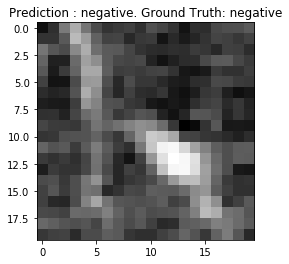

In [40]:
test_data, test_labels = get_test_data_simple_nn()
image_for_prediciton = test_data[2]
label = get_prediction_string(test_labels[2].argmax())
prediction = get_prediction_string(evaluator.predict_single(image_for_prediciton).argmax())
print("label: ", label)
print("prediction: ", prediction)
show_single_image(image_for_prediciton.reshape(IMG_SIZE,IMG_SIZE), "Prediction : {0}. Ground Truth: {1}".format(prediction, label))

Next, we can evaluate the performance of the model by printing the loss and the accuracy. We can see that a neural network with only one layer has good results.

In [41]:
print(evaluator.evaluate_model())

232/232 [==============================] - 0s 42us/sample - loss: 0.3868 - acc: 0.8879
Test loss: 0.3868493067807165
Test accuracy: 0.88793105
(0.3868493067807165, 0.88793105)


We can also print the confusion matrix.

In [42]:
cm = evaluator.confusion_matrix()
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

[[111   5]
 [ 21  95]]
0.8879310344827587


In [43]:
print(evaluator.classification_report())

              precision    recall  f1-score   support

    negative       0.84      0.96      0.90       116
    positive       0.95      0.82      0.88       116

   micro avg       0.89      0.89      0.89       232
   macro avg       0.90      0.89      0.89       232
weighted avg       0.90      0.89      0.89       232
 samples avg       0.89      0.89      0.89       232

None


Print the ROC curve and comment.

As we can see from the ROC curve, the classifer is able to discriminate positive and negative labels with high probability. The area below the curve can tell us the probability that our model will correcly discriminate corectly positive and negative samples

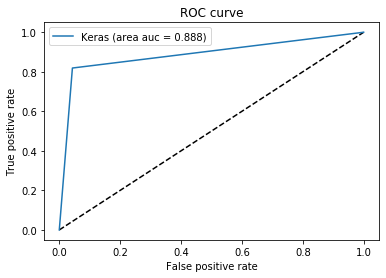

In [44]:
evaluator.plot_roc_curve()

We can see from the precision recall plot that the model that the dataset is balanced, and the model can discriminate well between the two classes

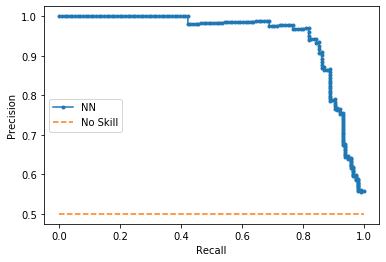

In [45]:
evaluator.plot_precision_recall()

Let's look at the training and validation loss during each epoch, we can see that these values are quite similar during each epoch. At the end we can see that the validation loss is a little bit greater than the training.

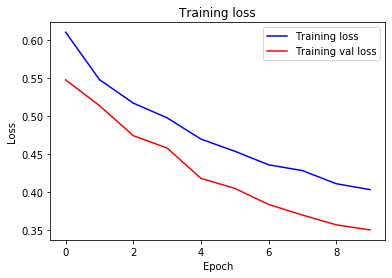

In [46]:
loss = trainer.loss
validation_loss = trainer.val_loss
plot_arrays(loss,validation_loss,"Training loss","Training val loss","Training loss")

In the same sense, we can see the accuracy for each epoch

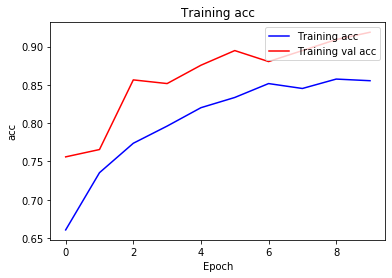

In [47]:
acc = trainer.acc
validation_acc = trainer.val_acc
plot_arrays(acc,validation_acc,"Training acc","Training val acc","Training acc","acc")

Let's look at the graphs given by tensor board

<img src="experiments/simple_nn/images/general.png"
     alt="Tensor board results">

Ephoc Accuracy : 

<img src="experiments/simple_nn/images/epoch_acc.svg"
     alt="Epcho acc">

Epoch Loss : 

<img src="experiments/simple_nn/images/epoch_loss.svg"
     alt="Epcho acc">

### Task 4.1: Artificial Neural Networks (3 layers) - Let's go deep!

Let's try 3 fully-connected layers using **sigmoid** activation function. Choose different values for the learning rate, number of epochs and batch size (e.g. 10, 20, 30...). 

Here is an example network but you are free to choose your own network.
* 1st FC with 80 neurons, sigmoid/relu
* 2nd FC with 40 neurons, sigmoid/relu
* 3rd FC with 2 neurons and softmax
* optimizer: sgd or adam or ...

Explain your network's architecture and **test** your system as you did for the previous simple neural network. What do you observation? Print some graphs which indicate **underfitting** and **overfitting**. 

Let's define several parameters to train our model

In [48]:
batch_sizes = [10,20,40]
learning_rates = [1e-4,1e-3,1e-1]
epochs = [10,40,100]

We define the configuration for the new model we will train

In [49]:
config_three_layer_nn = {
  "exp": {
    "name": "three_layer_neural_net"
  },
  "model":{
    "learning_rate": 1e-4,
    "optimizer": "adam",
    "activation" : "sigmoid",
    "loss" : "categorical_crossentropy",
    "drop_out" : 0.5
  },
  "trainer":{
    "num_epochs": 10,
    "batch_size": 10,
    "validation_split":0.1,
    "verbose_training": True
  },
  "callbacks":{
    "checkpoint_monitor": "val_loss",
    "checkpoint_mode": "min",
    "checkpoint_save_best_only": True,
    "checkpoint_save_weights_only": True,
    "checkpoint_verbose": True,
    "tensorboard_write_graph": True,
    "tensorboard_log_dir" : "logs/",
    "checkpoint_dir" : "checkpoints/",
    "history_dir" : "history_params/"  
  }
}

We define the class for the three layer neural network

In [50]:
class ThreeLayerNeuralNetModel(BaseModel):
    def __init__(self, config):
        super(ThreeLayerNeuralNetModel, self).__init__(config)
        self.build_model()

    def build_model(self):
        self.model = Sequential()
        self.model.add(Dense(80, activation=self.config['model']['activation'], input_shape=(IMG_SIZE * IMG_SIZE,)))
        self.model.add(Dense(40, activation=self.config['model']['activation']))
        self.model.add(Dense(2, activation='softmax'))
    
        self.model.compile(
            loss=self.config['model']['loss'],
            optimizer=self.config['model']['optimizer'],
            metrics=['accuracy'],
        )

In [51]:
model_three_layer_simple_nn = ThreeLayerNeuralNetModel(config_three_layer_nn)  # Create the model based on configuration file

We can see as well the summary of the new model

In [52]:
model_three_layer_simple_nn.model.summary()  # Print a summary of the model with the respective parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                32080     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 35,402
Trainable params: 35,402
Non-trainable params: 0
_________________________________________________________________


In [53]:
trainer_three_layer_nn = NeuralNetTrainer(model_three_layer_simple_nn.model, get_train_data_simple_nn(), config_three_layer_nn)
trainer_three_layer_nn.train()

Train on 1874 samples, validate on 209 samples
Epoch 1/10
1650/1874 [=========================>....] - ETA: 0s - loss: 0.5670 - acc: 0.7224
Epoch 00001: val_loss improved from inf to 0.45451, saving model to experiments/three_layer_neural_net/checkpoints/three_layer_neural_net-01-0.45.hdf5
1874/1874 [==============================] - 1s 459us/sample - loss: 0.5544 - acc: 0.7321 - val_loss: 0.4545 - val_acc: 0.8373
Epoch 2/10
1780/1874 [===========================>..] - ETA: 0s - loss: 0.4241 - acc: 0.8062
Epoch 00002: val_loss improved from 0.45451 to 0.35844, saving model to experiments/three_layer_neural_net/checkpoints/three_layer_neural_net-02-0.36.hdf5
1874/1874 [==============================] - 1s 277us/sample - loss: 0.4253 - acc: 0.8052 - val_loss: 0.3584 - val_acc: 0.8373
Epoch 3/10
1630/1874 [=========================>....] - ETA: 0s - loss: 0.3719 - acc: 0.8270
Epoch 00003: val_loss improved from 0.35844 to 0.29693, saving model to experiments/three_layer_neural_net/checkpo

As we did above, we will assess the results of the model

In [54]:
evaluator_three_layer_nn = NeuralNetDataPredictor(model_three_layer_simple_nn.model, get_test_data_simple_nn(), config_three_layer_nn)

We can see that the test accuracy improves in a significant way reaching more than 90%

In [55]:
print(evaluator_three_layer_nn.evaluate_model())

232/232 [==============================] - 0s 45us/sample - loss: 0.2317 - acc: 0.9138
Test loss: 0.23169318971962766
Test accuracy: 0.9137931
(0.23169318971962766, 0.9137931)


We can also see the confusion matrix

In [56]:
cm = evaluator_three_layer_nn.confusion_matrix()
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

[[114   2]
 [ 18  98]]
0.9137931034482759


In [57]:
print(evaluator_three_layer_nn.classification_report())

              precision    recall  f1-score   support

    negative       0.86      0.98      0.92       116
    positive       0.98      0.84      0.91       116

   micro avg       0.91      0.91      0.91       232
   macro avg       0.92      0.91      0.91       232
weighted avg       0.92      0.91      0.91       232
 samples avg       0.91      0.91      0.91       232

None


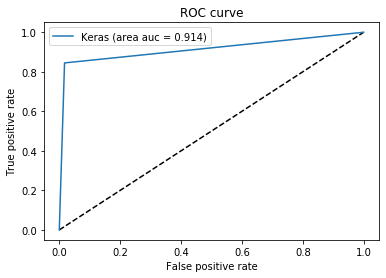

In [58]:
evaluator_three_layer_nn.plot_roc_curve()

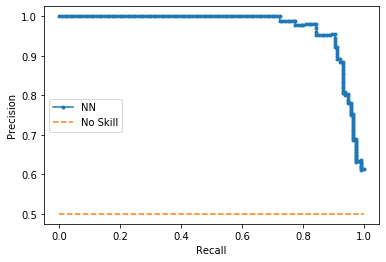

In [59]:
evaluator_three_layer_nn.plot_precision_recall()

A sign that could indicate overfitting is that the training loss is way lower than the validation loss. This would mean that the model does not generalize well

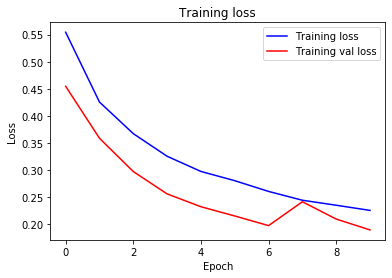

In [60]:
loss = trainer_three_layer_nn.loss
validation_loss = trainer_three_layer_nn.val_loss
plot_arrays(loss,validation_loss,"Training loss","Training val loss","Training loss")

From the plots, we can see that the training accuracy at the final epoch is bigger than the validation accuracy, as stated above this can be a sign of overfitting.

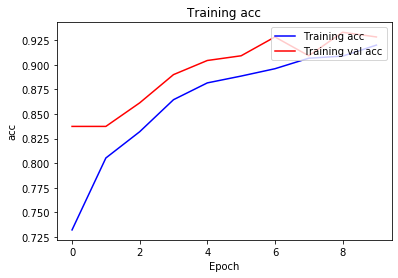

In [61]:
acc = trainer_three_layer_nn.acc
validation_acc = trainer_three_layer_nn.val_acc
plot_arrays(acc,validation_acc,"Training acc","Training val acc","Training acc","acc")

<img src="experiments/three_layer_neural_net/images/general.png"
alt="Tensor board results">
<img src="experiments/three_layer_neural_net/images/accuracy.png"
alt="Epcho acc">
<img src="experiments/three_layer_neural_net/images/loss.png"
alt="Epcho acc">

Now we will try with different hyperparameters. First we will define methods we can re use it later

In [62]:
def plot_loss_and_accuracy(loss,validation_loss,acc,validation_acc,title=""):
    plot_arrays(loss,validation_loss,"Training loss","Training val loss","Loss {0}".format(title).format(learning_rate,epoch,batch_size))
    plot_arrays(acc,validation_acc,"Training acc","Training val acc","acc {0}".format(title),"acc")

In [63]:
def train_model_and_get_loss_and_accuracy(config,model,train_data):
    trainer_model = NeuralNetTrainer(model.model, train_data, config)
    trainer_model.train()
    loss = trainer_model.loss
    validation_loss = trainer_model.val_loss
    acc = trainer_model.acc
    validation_acc = trainer_model.val_acc
    return loss, validation_loss, acc, validation_acc
    
    

In [64]:
def train_and_evaluate_model(config,model,train_data,test_data,title=""):
    loss, validation_loss, acc, validation_acc = train_model_and_get_loss_and_accuracy(config,model,train_data)
    plot_loss_and_accuracy(loss,validation_loss,acc,validation_acc,title)
    evaluator_model = NeuralNetDataPredictor(model.model, test_data, config)
    print("------------")
    print("MODEL RESULTS {0}: ".format(title))
    print(evaluator_model.evaluate_model())
    print("------------")
    return evaluator_model
    

Now we will run the model with different parameters. This step can take a long time since several configuration are being trained. The average training validation loss is saved in a dictionary to see which configuration has a better result. If the model generalizes well on unseen data then the training validation loss will be smaller. We will plot the loss after the end of each model training to see the results

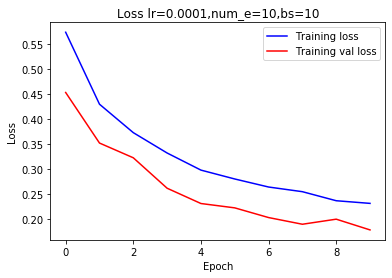

232/232 [==============================] - 0s 43us/sample - loss: 0.2210 - acc: 0.9181
Test loss: 0.2210092729535596
Test accuracy: 0.91810346


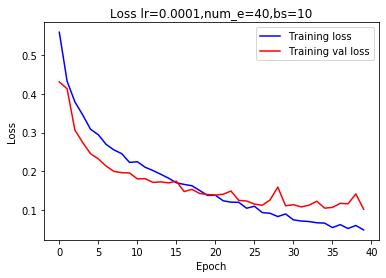

232/232 [==============================] - 0s 43us/sample - loss: 0.1446 - acc: 0.9440
Test loss: 0.14455669142048935
Test accuracy: 0.9439655


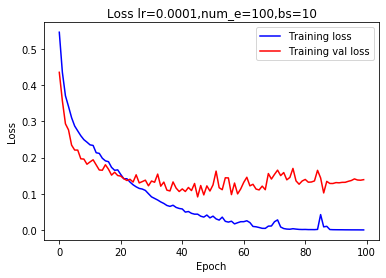

232/232 [==============================] - 0s 61us/sample - loss: 0.3084 - acc: 0.9483
Test loss: 0.3083757465335958
Test accuracy: 0.94827586


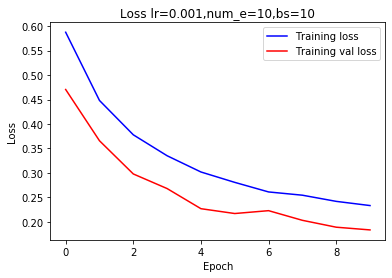

232/232 [==============================] - 0s 57us/sample - loss: 0.2345 - acc: 0.9181
Test loss: 0.23448252369617595
Test accuracy: 0.91810346


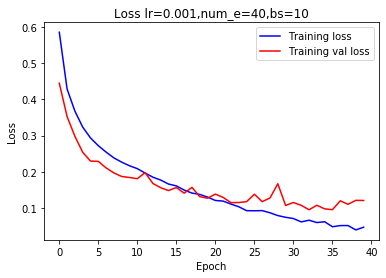

232/232 [==============================] - 0s 71us/sample - loss: 0.1647 - acc: 0.9440
Test loss: 0.16471435277369514
Test accuracy: 0.9439655


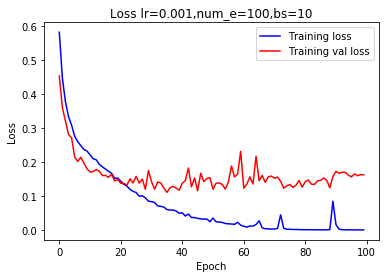

232/232 [==============================] - 0s 56us/sample - loss: 0.2656 - acc: 0.9483
Test loss: 0.26556561330076434
Test accuracy: 0.94827586


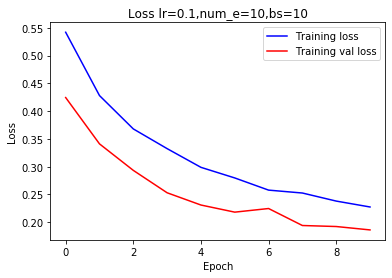

232/232 [==============================] - 0s 70us/sample - loss: 0.2329 - acc: 0.9009
Test loss: 0.2328631405172677
Test accuracy: 0.9008621


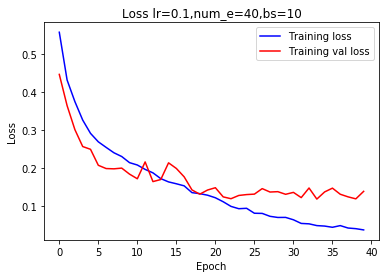

232/232 [==============================] - 0s 57us/sample - loss: 0.1589 - acc: 0.9526
Test loss: 0.15893581201290263
Test accuracy: 0.95258623


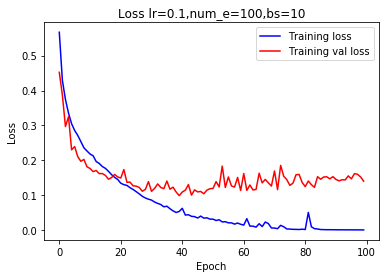

232/232 [==============================] - 0s 65us/sample - loss: 0.2562 - acc: 0.9569
Test loss: 0.25615718729537107
Test accuracy: 0.95689654


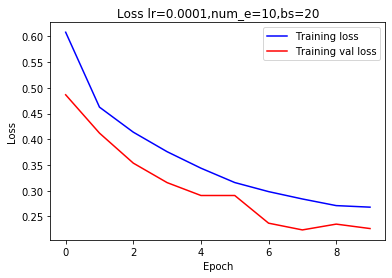

232/232 [==============================] - 0s 68us/sample - loss: 0.2547 - acc: 0.9181
Test loss: 0.2546594081253841
Test accuracy: 0.91810346


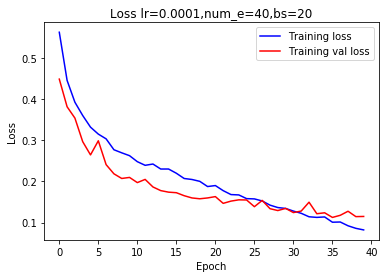

232/232 [==============================] - 0s 63us/sample - loss: 0.1594 - acc: 0.9397
Test loss: 0.15937162267750707
Test accuracy: 0.9396552


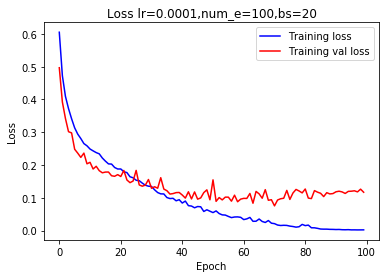

232/232 [==============================] - 0s 65us/sample - loss: 0.2470 - acc: 0.9526
Test loss: 0.24695907674472908
Test accuracy: 0.95258623


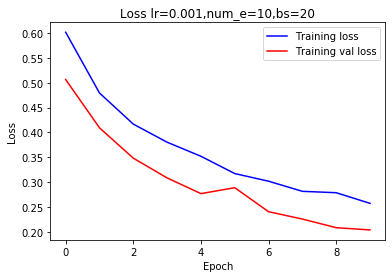

232/232 [==============================] - 0s 65us/sample - loss: 0.2595 - acc: 0.9009
Test loss: 0.2594975356397958
Test accuracy: 0.9008621


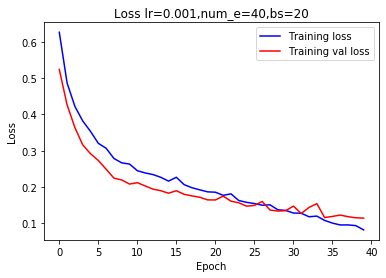

232/232 [==============================] - 0s 62us/sample - loss: 0.1670 - acc: 0.9397
Test loss: 0.16703589466111413
Test accuracy: 0.9396552


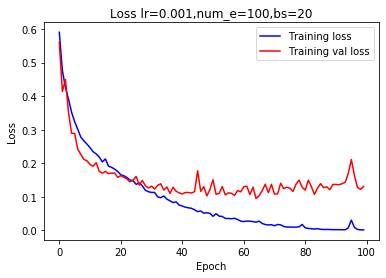

232/232 [==============================] - 0s 62us/sample - loss: 0.2211 - acc: 0.9526
Test loss: 0.2210757452031148
Test accuracy: 0.95258623


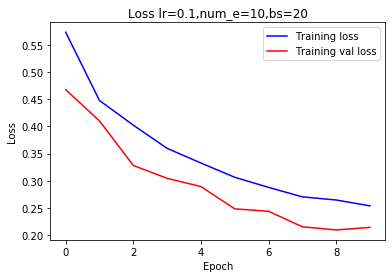

232/232 [==============================] - 0s 68us/sample - loss: 0.2532 - acc: 0.9138
Test loss: 0.25315291717134675
Test accuracy: 0.9137931


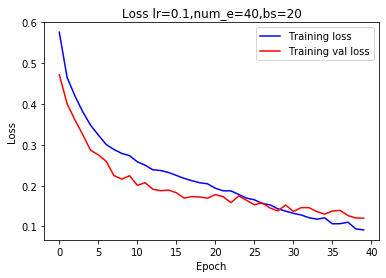

232/232 [==============================] - 0s 68us/sample - loss: 0.1503 - acc: 0.9397
Test loss: 0.15029881689055213
Test accuracy: 0.9396552


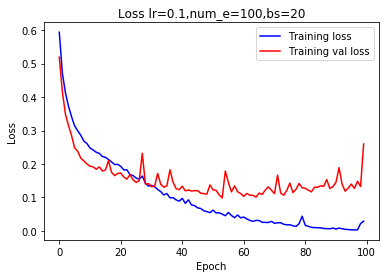

232/232 [==============================] - 0s 125us/sample - loss: 0.3087 - acc: 0.9440
Test loss: 0.308711984804992
Test accuracy: 0.9439655


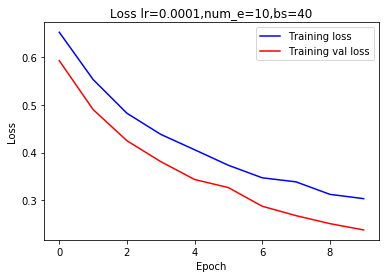

232/232 [==============================] - 0s 118us/sample - loss: 0.2837 - acc: 0.9095
Test loss: 0.2836673814674904
Test accuracy: 0.9094828


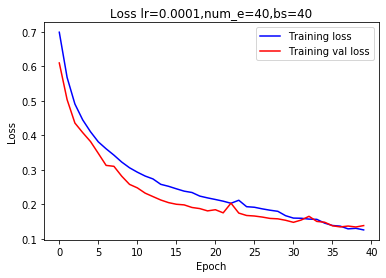

232/232 [==============================] - 0s 148us/sample - loss: 0.1582 - acc: 0.9310
Test loss: 0.15820216310435328
Test accuracy: 0.9310345


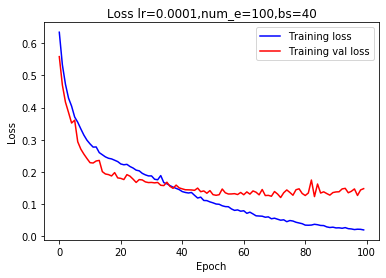

232/232 [==============================] - 0s 66us/sample - loss: 0.1961 - acc: 0.9526
Test loss: 0.19609554009190922
Test accuracy: 0.95258623


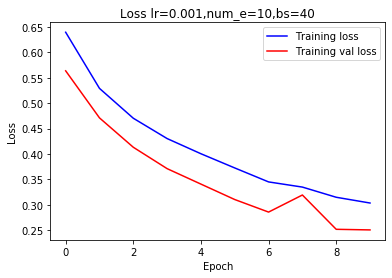

232/232 [==============================] - 0s 66us/sample - loss: 0.2841 - acc: 0.8966
Test loss: 0.2840962081119932
Test accuracy: 0.8965517


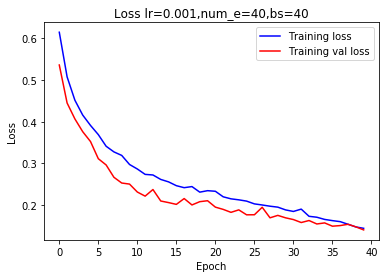

232/232 [==============================] - 0s 153us/sample - loss: 0.1741 - acc: 0.9310
Test loss: 0.17413703634821134
Test accuracy: 0.9310345


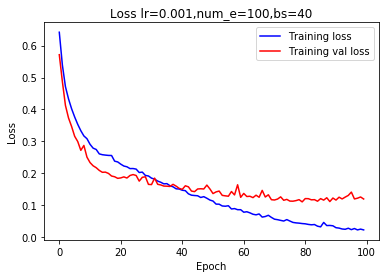

232/232 [==============================] - 0s 69us/sample - loss: 0.1684 - acc: 0.9569
Test loss: 0.16837371757318234
Test accuracy: 0.95689654


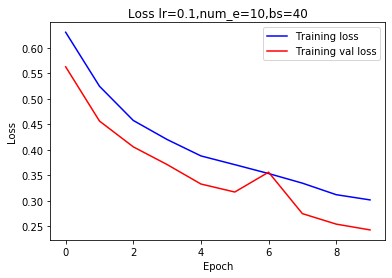

232/232 [==============================] - 0s 65us/sample - loss: 0.2786 - acc: 0.9138
Test loss: 0.2785954598722787
Test accuracy: 0.9137931


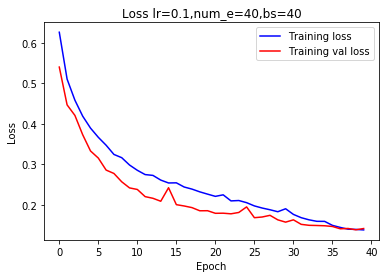

232/232 [==============================] - 0s 72us/sample - loss: 0.1855 - acc: 0.9353
Test loss: 0.1854764387525361
Test accuracy: 0.9353448


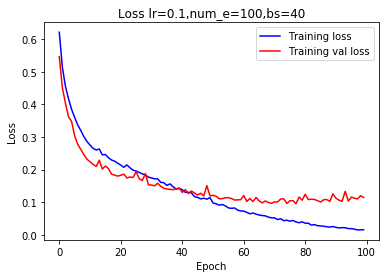

232/232 [==============================] - 0s 115us/sample - loss: 0.1770 - acc: 0.9569
Test loss: 0.17700202345591168
Test accuracy: 0.95689654


In [65]:
dic_res = {}
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for epoch in epochs:
            config_three_layer_nn["model"]["learning_rate"] = learning_rate
            config_three_layer_nn["trainer"]["num_epochs"] = epoch
            config_three_layer_nn["trainer"]["batch_size"] = batch_size
            config_three_layer_nn['trainer']['verbose_training'] = False
            config_three_layer_nn['callbacks']['checkpoint_verbose'] = False
            model_three_layer_simple_nn = ThreeLayerNeuralNetModel(config_three_layer_nn) 
            loss, validation_loss, acc, validation_acc = train_model_and_get_loss_and_accuracy(config_three_layer_nn,model_three_layer_simple_nn,get_train_data_simple_nn())
            plot_arrays(loss,validation_loss,"Training loss","Training val loss","Loss lr={0},num_e={1},bs={2}".format(learning_rate,epoch,batch_size))
            evaluator = NeuralNetDataPredictor(model_three_layer_simple_nn.model, get_test_data_simple_nn(), config_three_layer_nn)
            test_loss, test_accuracy = evaluator.evaluate_model()
            dic_res["lr={0},num_e={1},bs={2}".format(learning_rate,epoch,batch_size)] = np.mean(validation_loss)
            

We can see the results of the dictionary for every configuration

In [66]:
dic_res

{'lr=0.0001,num_e=10,bs=10': 0.2612076751905622,
 'lr=0.0001,num_e=40,bs=10': 0.16976888569320245,
 'lr=0.0001,num_e=100,bs=10': 0.14765738302742062,
 'lr=0.001,num_e=10,bs=10': 0.2645241285892622,
 'lr=0.001,num_e=40,bs=10': 0.1627035721958115,
 'lr=0.001,num_e=100,bs=10': 0.16047061450048158,
 'lr=0.1,num_e=10,bs=10': 0.2558796239098864,
 'lr=0.1,num_e=40,bs=10': 0.17472455117100366,
 'lr=0.1,num_e=100,bs=10': 0.15075337141841894,
 'lr=0.0001,num_e=10,bs=20': 0.3070496246272154,
 'lr=0.0001,num_e=40,bs=20': 0.1843623675198771,
 'lr=0.0001,num_e=100,bs=20': 0.14087617673152505,
 'lr=0.001,num_e=10,bs=20': 0.30153919710425664,
 'lr=0.001,num_e=40,bs=20': 0.1936870585338315,
 'lr=0.001,num_e=100,bs=20': 0.1536368850909829,
 'lr=0.1,num_e=10,bs=20': 0.2931877252463091,
 'lr=0.1,num_e=40,bs=20': 0.1956787471060138,
 'lr=0.1,num_e=100,bs=20': 0.15570592587271379,
 'lr=0.0001,num_e=10,bs=40': 0.3602506135496797,
 'lr=0.0001,num_e=40,bs=40': 0.22698557606038222,
 'lr=0.0001,num_e=100,bs=40':

We can use the configuration that resulted in the smallest training validation loss. We want to use this meassure in particular beacuse by doing this we can see how well the model performs with unseen data

In [67]:
min_loss = min(dic_res.keys(), key=(lambda k: dic_res[k]))
print("min_loss: {0} for {1} ".format(dic_res[min_loss], min_loss))

min_loss: 0.14087617673152505 for lr=0.0001,num_e=100,bs=20 


In [68]:
hyperparameters = min_loss.split(",")
print(hyperparameters)

['lr=0.0001', 'num_e=100', 'bs=20']


In [69]:
values_hyperparameters = list(map(lambda hp: float(hp.split("=")[1]),hyperparameters))
print(values_hyperparameters)

[0.0001, 100.0, 20.0]


### Task 4.2: Relu!
RELU = Rectified Linear Unit

Let's try the same network but using RELU instead of sigmoid now.

We will use the parameters we got as a result from the previous section and add the relu activation function. As we can see from the results below, the accuracy increases reaching more than 93%

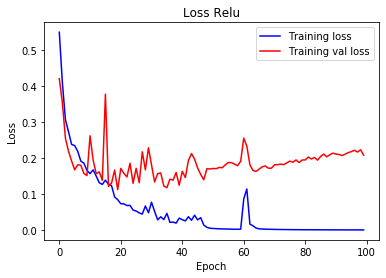

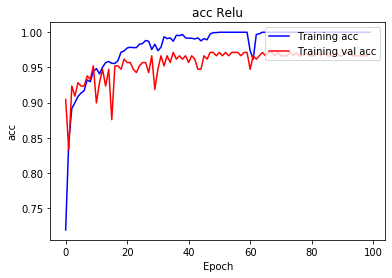

------------
MODEL RESULTS Relu: 
232/232 [==============================] - 0s 73us/sample - loss: 0.3509 - acc: 0.9483
Test loss: 0.35087845346023294
Test accuracy: 0.94827586
(0.35087845346023294, 0.94827586)
------------


In [70]:
config_three_layer_nn['model']['activation'] = 'relu'
config_three_layer_nn['model']["learning_rate"] = values_hyperparameters[0]
config_three_layer_nn["trainer"]["batch_size"] = values_hyperparameters[2]
config_three_layer_nn["trainer"]["num_epochs"] = values_hyperparameters[1]
model_three_layer_simple_nn = ThreeLayerNeuralNetModel(config_three_layer_nn)  # Create the model based on configuration file
evaluator = train_and_evaluate_model(config_three_layer_nn,model_three_layer_simple_nn,get_train_data_simple_nn(),get_test_data_simple_nn(),"Relu")



We can see from the ROC curve that this model can almost perfectly discriminate between positive and negative cases.

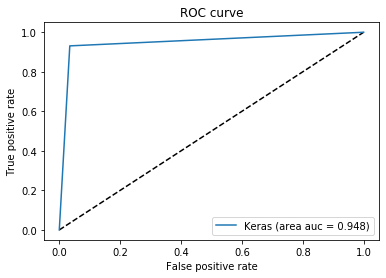

In [71]:
evaluator.plot_roc_curve()

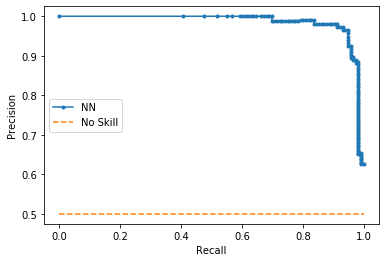

In [72]:
evaluator.plot_precision_recall()

### Task 4.3: Dropout!
Use dropout. Some recommended values to investigate are 0.9, 0.5, 0.1. Explain the results.

Now we will study the results when we add a Dropout layer. This will help us deal with overfitting depending on the how much we penalize the weights

We will create a similar model but adding the dropout layer

In [73]:
class ThreeLayerNeuralNetModelDropout(BaseModel):
    def __init__(self, config):
        super(ThreeLayerNeuralNetModelDropout, self).__init__(config)
        self.build_model()

    def build_model(self):
        self.model = Sequential()
        self.model.add(Dense(80, activation=self.config['model']['activation'], input_shape=(IMG_SIZE * IMG_SIZE,)))
        self.model.add(Dense(40, activation=self.config['model']['activation']))
        self.model.add(Dropout(self.config['model']['drop_out']))
        self.model.add(Dense(2, activation='softmax'))
    
        self.model.compile(
            loss='binary_crossentropy',
            optimizer=self.config['model']['optimizer'],
            metrics=['accuracy'],
        )

We will use three different values for the value of the dropout to see the results of the loss and accuracy for the training and testing set

-----------------
RESULTS DROPOUT 0.1
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


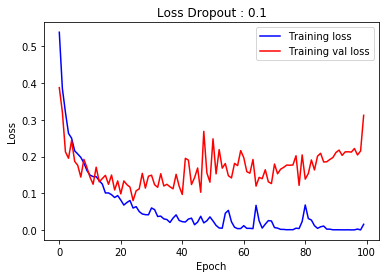

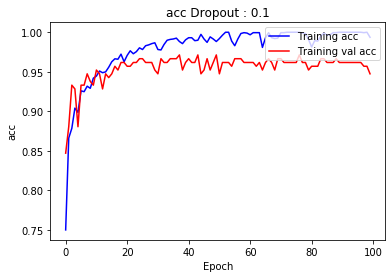

------------
MODEL RESULTS Dropout : 0.1: 
232/232 [==============================] - 0s 72us/sample - loss: 0.2931 - acc: 0.9440
Test loss: 0.2931313843562685
Test accuracy: 0.9439655
(0.2931313843562685, 0.9439655)
------------
-----------------
-----------------
RESULTS DROPOUT 0.5


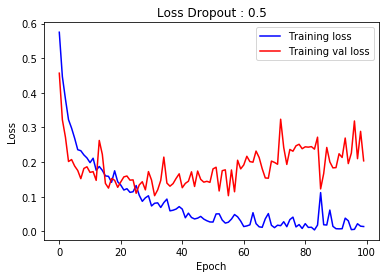

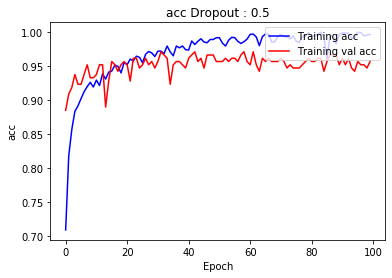

------------
MODEL RESULTS Dropout : 0.5: 
232/232 [==============================] - 0s 67us/sample - loss: 0.3494 - acc: 0.9526
Test loss: 0.3493772683472469
Test accuracy: 0.95258623
(0.3493772683472469, 0.95258623)
------------
-----------------
-----------------
RESULTS DROPOUT 0.9


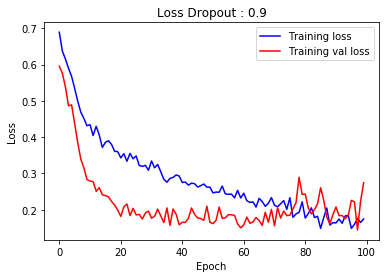

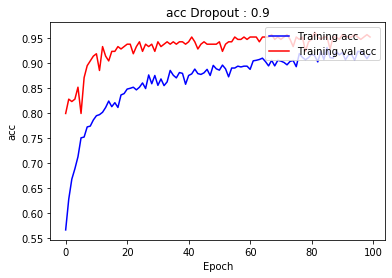

------------
MODEL RESULTS Dropout : 0.9: 
232/232 [==============================] - 0s 78us/sample - loss: 0.3263 - acc: 0.9224
Test loss: 0.32634299119998667
Test accuracy: 0.92241377
(0.32634299119998667, 0.92241377)
------------
-----------------


In [74]:
dropout_test = [0.1,0.5,0.9]
evaluators_drop_out = []

for drop_out in dropout_test:
    print("-----------------")
    print("RESULTS DROPOUT {0}".format(drop_out))
    config_three_layer_nn["model"]["drop_out"] = drop_out
    model_three_layer_simple_nn_dropout = ThreeLayerNeuralNetModelDropout(config_three_layer_nn)  
    evaluator_dropout = train_and_evaluate_model(config_three_layer_nn,model_three_layer_simple_nn_dropout,get_train_data_simple_nn(),get_test_data_simple_nn(),"Dropout : {0}".format(drop_out))
    evaluators_drop_out.append(evaluator_dropout)
    print("-----------------")


#### summary

Dropout 0.1: 
232/232 [==============================] - 0s 80us/sample - loss: 0.2931 - acc: 0.9440
Test loss: 0.2931313843562685
Test accuracy: 0.9439655
(0.2931313843562685, 0.9439655)


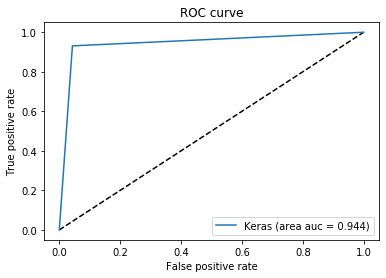

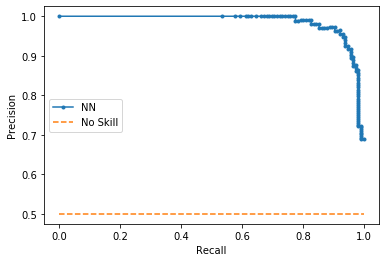

Dropout 0.5: 
232/232 [==============================] - 0s 72us/sample - loss: 0.3494 - acc: 0.9526
Test loss: 0.3493772683472469
Test accuracy: 0.95258623
(0.3493772683472469, 0.95258623)


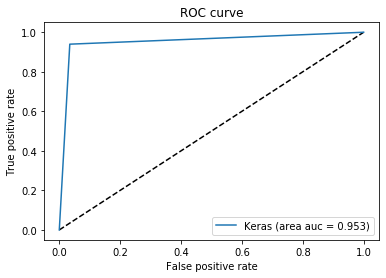

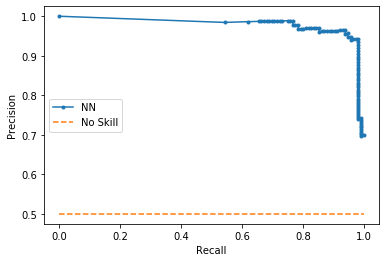

Dropout 0.9: 
232/232 [==============================] - 0s 102us/sample - loss: 0.3263 - acc: 0.9224
Test loss: 0.32634299119998667
Test accuracy: 0.92241377
(0.32634299119998667, 0.92241377)


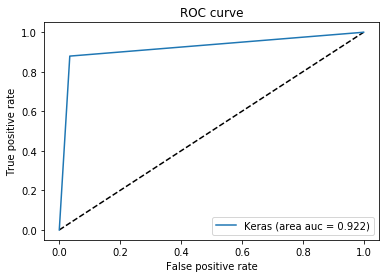

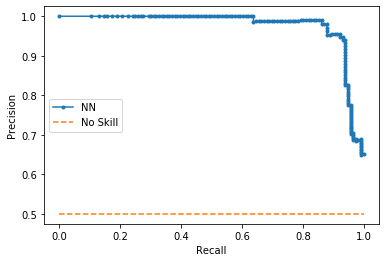

In [75]:
print("Dropout 0.1: ")
print(evaluators_drop_out[0].evaluate_model())
evaluators_drop_out[0].plot_roc_curve()
evaluators_drop_out[0].plot_precision_recall()

print("Dropout 0.5: ")
print(evaluators_drop_out[1].evaluate_model())
evaluators_drop_out[1].plot_roc_curve()
evaluators_drop_out[1].plot_precision_recall()

print("Dropout 0.9: ")
print(evaluators_drop_out[2].evaluate_model())
evaluators_drop_out[2].plot_roc_curve()
evaluators_drop_out[2].plot_precision_recall()

### Task 5. A Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 3x3, number of channels = 64, activation function = sigmoid
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 50 neurons, activation function = sigmoid
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

First we declare the configuration dictionary for the cnn

In [76]:
config_cnn = {
  "exp": {
    "name": "simple_cnn"
  },
  "model":{
    "learning_rate": 1e-4,
    "optimizer": "adam",
    "activation" : "sigmoid" ,
    "drop_out" : 0.5,
    "loss": "categorical_crossentropy"
  },
  "trainer":{
    "num_epochs": 100,
    "batch_size": 30,
    "validation_split":0.1,
    "verbose_training": True
  },
  "callbacks":{
    "checkpoint_monitor": "val_loss",
    "checkpoint_mode": "min",
    "checkpoint_save_best_only": True,
    "checkpoint_save_weights_only": True,
    "checkpoint_verbose": False,
    "tensorboard_write_graph": True,
    "tensorboard_log_dir" : "logs/",
    "checkpoint_dir" : "checkpoints/",
    "history_dir" : "history_params/"  
  }
}

Now we can define our model with the configurations given above

In [77]:
class SimpleCnnModel(BaseModel):
    def __init__(self, config):
        super(SimpleCnnModel, self).__init__(config)
        self.build_model()

    def build_model(self):
        # Import the sequential model from keras to build a neural network
        self.model = Sequential()

        self.model.add(Conv2D(64, kernel_size=(3, 3),
                              activation='sigmoid', input_shape=(IMG_SIZE, IMG_SIZE, 1)))

        self.model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
        
        self.model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))


        # Flatten data to 1 dimension
        self.model.add(Flatten())

        self.model.add(Dense(50, activation='sigmoid'))
        self.model.add(Dropout(.5))

        # Finally we have our output layer with 10 neurons for our 10 classes,
        # for that we use the softmax activation function
        self.model.add(Dense(2, activation='softmax'))

        self.model.compile(
            loss=self.config['model']['loss'],
            optimizer=self.config['model']['optimizer'],
            metrics=['accuracy'])


Now we can train and evaluate the model, it can be seen from the results that this model achieves an acceptable accuracy on the test data of 94%

Train on 1874 samples, validate on 209 samples
Epoch 1/100
1874/1874 [==============================] - 4s 2ms/sample - loss: 0.7442 - acc: 0.5005 - val_loss: 0.6899 - val_acc: 0.5407
Epoch 2/100
1874/1874 [==============================] - 2s 921us/sample - loss: 0.7086 - acc: 0.5117 - val_loss: 0.6920 - val_acc: 0.5837
Epoch 3/100
1874/1874 [==============================] - 2s 910us/sample - loss: 0.6946 - acc: 0.5224 - val_loss: 0.6868 - val_acc: 0.5646
Epoch 4/100
1874/1874 [==============================] - 2s 863us/sample - loss: 0.6725 - acc: 0.5758 - val_loss: 0.5848 - val_acc: 0.7895
Epoch 5/100
1874/1874 [==============================] - 2s 932us/sample - loss: 0.5405 - acc: 0.7519 - val_loss: 0.4208 - val_acc: 0.8182
Epoch 6/100
1874/1874 [==============================] - 2s 919us/sample - loss: 0.4401 - acc: 0.7956 - val_loss: 0.3362 - val_acc: 0.8469
Epoch 7/100
1874/1874 [==============================] - 2s 891us/sample - loss: 0.4098 - acc: 0.8148 - val_loss: 0.3292 

1874/1874 [==============================] - 2s 913us/sample - loss: 0.1752 - acc: 0.9322 - val_loss: 0.1206 - val_acc: 0.9617
Epoch 60/100
1874/1874 [==============================] - 2s 1ms/sample - loss: 0.1711 - acc: 0.9381 - val_loss: 0.1066 - val_acc: 0.9761
Epoch 61/100
1874/1874 [==============================] - 2s 899us/sample - loss: 0.1761 - acc: 0.9301 - val_loss: 0.1087 - val_acc: 0.9761
Epoch 62/100
1874/1874 [==============================] - 2s 831us/sample - loss: 0.1633 - acc: 0.9424 - val_loss: 0.1380 - val_acc: 0.9522
Epoch 63/100
1874/1874 [==============================] - 2s 882us/sample - loss: 0.1739 - acc: 0.9376 - val_loss: 0.1031 - val_acc: 0.9809
Epoch 64/100
1874/1874 [==============================] - 2s 978us/sample - loss: 0.1657 - acc: 0.9354 - val_loss: 0.1126 - val_acc: 0.9569
Epoch 65/100
1874/1874 [==============================] - 2s 1ms/sample - loss: 0.1533 - acc: 0.9461 - val_loss: 0.1016 - val_acc: 0.9713
Epoch 66/100
1874/1874 [=============

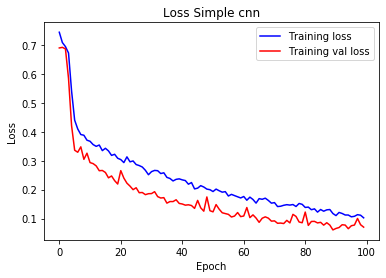

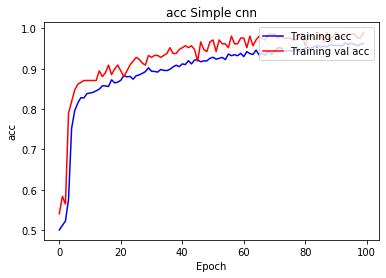

------------
MODEL RESULTS Simple cnn: 
232/232 [==============================] - 0s 294us/sample - loss: 0.1426 - acc: 0.9397
Test loss: 0.14261652529239655
Test accuracy: 0.9396552
(0.14261652529239655, 0.9396552)
------------


In [78]:
model_simple_cnn = SimpleCnnModel(config_cnn) 
evaluator_simple_cnn = train_and_evaluate_model(config_cnn,model_simple_cnn,get_train_data_cnn(),get_test_data_cnn(),"Simple cnn")


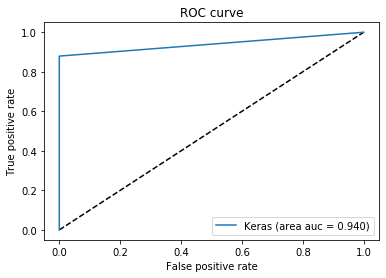

In [79]:
evaluator_simple_cnn.plot_roc_curve()

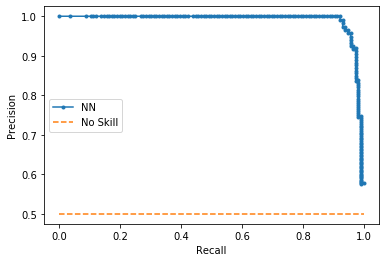

In [80]:
evaluator_simple_cnn.plot_precision_recall()

<img src="experiments/simple_cnn/images/general.png"
alt="Tensor board results">
<img src="experiments/simple_cnn/images/accuracy.png"
alt="Epcho acc">
<img src="experiments/simple_cnn/images/loss.png"
alt="Epcho acc">

### Task 6. A Deeper Convolutional Neural Network

#### Model definition

input -> conv1 -> pool1 -> conv2 -> conv3 -> fc1 -> fc2 -> softmax
* convolution layers: kernel size = 5x5, number of channels = 64, activation function = relu
* max-pooling layers: kernel size = 2x2, strides = 2
* 1st fully connected: 100 neurons, activation function = relu
* 2nd fully connected: 2 neurons, activation function = softmax
* optimizer = sgd / adam
* use dropout (e.g. 0.5)

Like before, measure system's prerfomance and explain.

First we declare the model as usual with the parameters stated above

In [81]:
class DeepCnnModel(BaseModel):
    def __init__(self, config):
        super(DeepCnnModel, self).__init__(config)
        self.build_model()

    def build_model(self):
        # Import the sequential model from keras to build a neural network
        self.model = Sequential()

        self.model.add(Conv2D(64, kernel_size=(5, 5),
                              activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))

        self.model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
        
        self.model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',padding='same'))
        self.model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',padding='same'))


        # Flatten data to 1 dimension
        self.model.add(Flatten())

        # Add a "hidden layer with 1000 neurons and a RELU activation function"
        self.model.add(Dense(100, activation='relu'))
        self.model.add(Dropout(.5))

        # Finally we have our output layer with 10 neurons for our 10 classes,
        # for that we use the softmax activation function
        self.model.add(Dense(2, activation='softmax'))

        self.model.compile(
            loss=self.config['model']['loss'],
            optimizer=self.config['model']['optimizer'],
            metrics=['accuracy'])

We can see from the results below that this model has a better accuracy than the previous one

In [82]:
config_cnn["exp"]["name"] = "deep_cnn"

Train on 1874 samples, validate on 209 samples
Epoch 1/100
1874/1874 [==============================] - 10s 5ms/sample - loss: 0.5104 - acc: 0.7401 - val_loss: 0.3087 - val_acc: 0.8947
Epoch 2/100
1874/1874 [==============================] - 6s 3ms/sample - loss: 0.3131 - acc: 0.8725 - val_loss: 0.2158 - val_acc: 0.9426
Epoch 3/100
1874/1874 [==============================] - 6s 3ms/sample - loss: 0.2437 - acc: 0.9050 - val_loss: 0.1403 - val_acc: 0.9569
Epoch 4/100
1874/1874 [==============================] - 6s 3ms/sample - loss: 0.1702 - acc: 0.9360 - val_loss: 0.0946 - val_acc: 0.9761
Epoch 5/100
1874/1874 [==============================] - 6s 3ms/sample - loss: 0.1492 - acc: 0.9509 - val_loss: 0.1013 - val_acc: 0.9665
Epoch 6/100
1874/1874 [==============================] - 5s 3ms/sample - loss: 0.1433 - acc: 0.9509 - val_loss: 0.1025 - val_acc: 0.9665
Epoch 7/100
1874/1874 [==============================] - 5s 3ms/sample - loss: 0.0906 - acc: 0.9642 - val_loss: 0.0664 - val_acc: 

1874/1874 [==============================] - 5s 2ms/sample - loss: 6.1713e-04 - acc: 1.0000 - val_loss: 0.1252 - val_acc: 0.9856
Epoch 60/100
1874/1874 [==============================] - 5s 2ms/sample - loss: 1.9295e-04 - acc: 1.0000 - val_loss: 0.1038 - val_acc: 0.9856
Epoch 61/100
1874/1874 [==============================] - 6s 3ms/sample - loss: 1.5374e-04 - acc: 1.0000 - val_loss: 0.1122 - val_acc: 0.9856
Epoch 62/100
1874/1874 [==============================] - 5s 3ms/sample - loss: 1.6477e-04 - acc: 1.0000 - val_loss: 0.1111 - val_acc: 0.9856
Epoch 63/100
1874/1874 [==============================] - 5s 3ms/sample - loss: 1.2081e-04 - acc: 1.0000 - val_loss: 0.1066 - val_acc: 0.9856
Epoch 64/100
1874/1874 [==============================] - 7s 4ms/sample - loss: 6.1485e-05 - acc: 1.0000 - val_loss: 0.1113 - val_acc: 0.9856
Epoch 65/100
1874/1874 [==============================] - 6s 3ms/sample - loss: 3.5560e-05 - acc: 1.0000 - val_loss: 0.1140 - val_acc: 0.9856
Epoch 66/100
1874/1

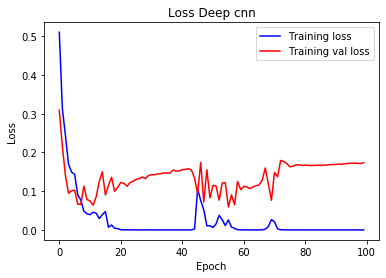

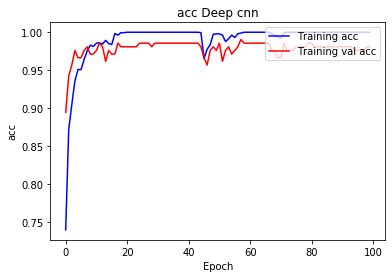

------------
MODEL RESULTS Deep cnn: 
232/232 [==============================] - 0s 694us/sample - loss: 0.1267 - acc: 0.9784
Test loss: 0.12666346302460718
Test accuracy: 0.9784483
(0.12666346302460718, 0.9784483)
------------


In [83]:
model_deep_cnn = DeepCnnModel(config_cnn) 
evaluator_deep_cnn = train_and_evaluate_model(config_cnn,model_deep_cnn,get_train_data_cnn(),get_test_data_cnn(),"Deep cnn")



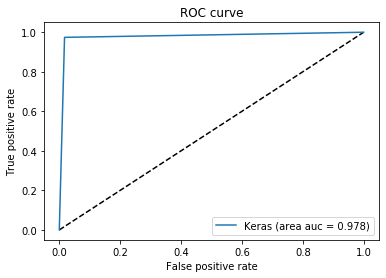

In [84]:
evaluator_deep_cnn.plot_roc_curve()

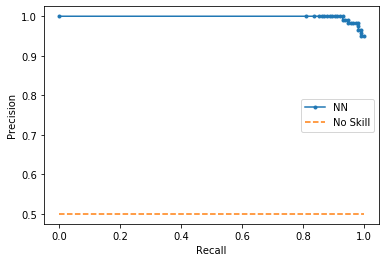

In [85]:
evaluator_deep_cnn.plot_precision_recall()

<img src="experiments/deep_cnn/images/general.png"
alt="Tensor board results">
<img src="experiments/deep_cnn/images/accuracy.png"
alt="Epcho acc">
<img src="experiments/deep_cnn/images/loss.png"
alt="Epcho acc">

### Task 7


Comment the network differences between the two convolutional neural networks. Which ones do you think have the strongest impact in the network's perfomance? Justify your answer. 

An implementation of one or more networks might be necessary to answer this question.

Let's review the results from the two convolutional neural networks implemented above 

##### Simple cnn

In [86]:
evaluator_simple_cnn.evaluate_model()

232/232 [==============================] - 0s 298us/sample - loss: 0.1426 - acc: 0.9397
Test loss: 0.14261652529239655
Test accuracy: 0.9396552


(0.14261652529239655, 0.9396552)

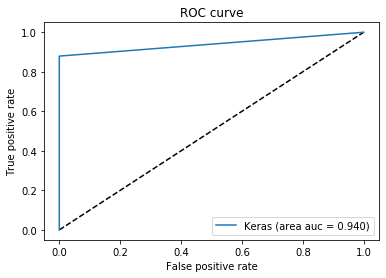

In [87]:
evaluator_simple_cnn.plot_roc_curve()

#### deep cnn

In [88]:

evaluator_deep_cnn.evaluate_model()

232/232 [==============================] - 0s 755us/sample - loss: 0.1267 - acc: 0.9784
Test loss: 0.12666346302460718
Test accuracy: 0.9784483


(0.12666346302460718, 0.9784483)

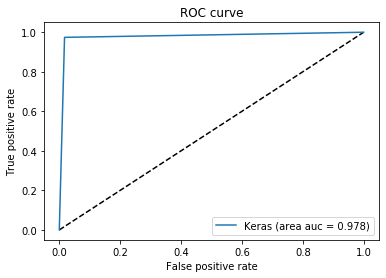

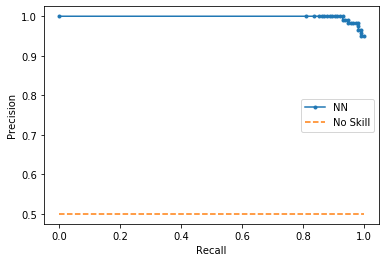

In [89]:
evaluator_deep_cnn.plot_roc_curve()
evaluator_deep_cnn.plot_precision_recall()

It can be seen that the second model has a better accuracy and generalizes better, this is due to the fact that the second model has more convolutional layers, therefore it can get more features out of the patch.

### (BONUS) Create your own convolution neural network

Create your own network and try to increase model's accuracy. You can use different:
* size of convolutional kernels
* activation functions
* optimizers ...
***

* **Extra task**: Select a different part of the dataset as test-set and repeat the training tasks

In [90]:
custom_cnn_config = {
  "exp": {
    "name": "custom_cnn"
  },
  "model":{
    "learning_rate": 1e-4,
    "optimizer": "adam",
    "activation" : "sigmoid" ,
    "drop_out" : 0.5,
    "loss": "binary_crossentropy"
  },
  "trainer":{
    "num_epochs": 90,
    "batch_size": 20,
    "validation_split":0.1,
    "verbose_training": True
  },
  "callbacks":{
    "checkpoint_monitor": "val_loss",
    "checkpoint_mode": "min",
    "checkpoint_save_best_only": True,
    "checkpoint_save_weights_only": True,
    "checkpoint_verbose": True,
    "tensorboard_write_graph": True,
    "tensorboard_log_dir" : "logs/",
    "checkpoint_dir" : "checkpoints/",
    "history_dir" : "history_params/"  
  }
}

In [91]:
class CustomCnnModel(BaseModel):
    def __init__(self, config):
        super(CustomCnnModel, self).__init__(config)
        self.build_model()

    def build_model(self):
        # Import the sequential model from keras to build a neural network
        self.model = Sequential()

        # Here we are going to add a convolutional layer with 128 filters with a size of 5x5, an activation function
        # relu, and input shape from a dimension 28x28. So this means we have an input layer, and a convolutional layer
        # at this point. Two in total :).
        self.model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same',
                              activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
        # Then we add a pooling layer, A pooling layer is a new layer added after the convolutional layer.
        # Specifically, after a nonlinearity (e.g. ReLU) has been applied to the feature maps output by a convolutional layer
        self.model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Here we add another convolutional with more filters with activation function
        self.model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))

        # Flatten data to 1 dimension
        self.model.add(Flatten())

        # Add a "hidden layer with 128 neurons and a RELU activation function"
        self.model.add(Dense(128, activation='relu'))

        # Dropout layer to prevent overfitting
        self.model.add(Dropout(.5))

        # Finally we have our output layer with 10 neurons for our 10 classes,
        # for that we use the softmax activation function
        self.model.add(Dense(2, activation='softmax'))

        self.model.compile(
            loss=self.config.model.loss,
            optimizer=self.config.model.optimizer,
            metrics=['accuracy'])


Train on 1874 samples, validate on 209 samples
Epoch 1/90
1860/1874 [============================>.] - ETA: 0s - loss: 0.4983 - acc: 0.7414
Epoch 00001: val_loss improved from inf to 0.27623, saving model to experiments/custom_cnn/checkpoints/custom_cnn-01-0.28.hdf5
1874/1874 [==============================] - 9s 5ms/sample - loss: 0.4969 - acc: 0.7423 - val_loss: 0.2762 - val_acc: 0.8756
Epoch 2/90
1860/1874 [============================>.] - ETA: 0s - loss: 0.3261 - acc: 0.8629
Epoch 00002: val_loss improved from 0.27623 to 0.18593, saving model to experiments/custom_cnn/checkpoints/custom_cnn-02-0.19.hdf5
1874/1874 [==============================] - 6s 3ms/sample - loss: 0.3248 - acc: 0.8634 - val_loss: 0.1859 - val_acc: 0.9474
Epoch 3/90
1860/1874 [============================>.] - ETA: 0s - loss: 0.2290 - acc: 0.9140
Epoch 00003: val_loss improved from 0.18593 to 0.15630, saving model to experiments/custom_cnn/checkpoints/custom_cnn-03-0.16.hdf5
1874/1874 [========================

1860/1874 [============================>.] - ETA: 0s - loss: 1.6265e-04 - acc: 1.0000
Epoch 00028: val_loss did not improve from 0.02653
1874/1874 [==============================] - 5s 3ms/sample - loss: 1.6144e-04 - acc: 1.0000 - val_loss: 0.0593 - val_acc: 0.9856
Epoch 29/90
1860/1874 [============================>.] - ETA: 0s - loss: 1.2969e-04 - acc: 1.0000
Epoch 00029: val_loss improved from 0.02653 to 0.02516, saving model to experiments/custom_cnn/checkpoints/custom_cnn-29-0.03.hdf5
1874/1874 [==============================] - 6s 3ms/sample - loss: 1.2885e-04 - acc: 1.0000 - val_loss: 0.0252 - val_acc: 0.9952
Epoch 30/90
1860/1874 [============================>.] - ETA: 0s - loss: 4.0009e-05 - acc: 1.0000
Epoch 00030: val_loss did not improve from 0.02516
1874/1874 [==============================] - 6s 3ms/sample - loss: 3.9792e-05 - acc: 1.0000 - val_loss: 0.0270 - val_acc: 0.9952
Epoch 31/90
1860/1874 [============================>.] - ETA: 0s - loss: 1.3950e-04 - acc: 1.0000


1874/1874 [==============================] - 6s 3ms/sample - loss: 2.8916e-05 - acc: 1.0000 - val_loss: 0.1011 - val_acc: 0.9761
Epoch 58/90
1860/1874 [============================>.] - ETA: 0s - loss: 1.2123e-05 - acc: 1.0000
Epoch 00058: val_loss did not improve from 0.02516
1874/1874 [==============================] - 5s 3ms/sample - loss: 1.2040e-05 - acc: 1.0000 - val_loss: 0.1006 - val_acc: 0.9761
Epoch 59/90
1860/1874 [============================>.] - ETA: 0s - loss: 3.0786e-05 - acc: 1.0000
Epoch 00059: val_loss did not improve from 0.02516
1874/1874 [==============================] - 6s 3ms/sample - loss: 3.0561e-05 - acc: 1.0000 - val_loss: 0.1105 - val_acc: 0.9761
Epoch 60/90
1860/1874 [============================>.] - ETA: 0s - loss: 1.2787e-05 - acc: 1.0000
Epoch 00060: val_loss did not improve from 0.02516
1874/1874 [==============================] - 6s 3ms/sample - loss: 1.2730e-05 - acc: 1.0000 - val_loss: 0.1113 - val_acc: 0.9761
Epoch 61/90
1860/1874 [==============

1860/1874 [============================>.] - ETA: 0s - loss: 4.4099e-06 - acc: 1.0000
Epoch 00087: val_loss did not improve from 0.02516
1874/1874 [==============================] - 6s 3ms/sample - loss: 4.3873e-06 - acc: 1.0000 - val_loss: 0.0869 - val_acc: 0.9856
Epoch 88/90
1860/1874 [============================>.] - ETA: 0s - loss: 9.5721e-07 - acc: 1.0000
Epoch 00088: val_loss did not improve from 0.02516
1874/1874 [==============================] - 7s 4ms/sample - loss: 9.5088e-07 - acc: 1.0000 - val_loss: 0.0876 - val_acc: 0.9856
Epoch 89/90
1860/1874 [============================>.] - ETA: 0s - loss: 1.2320e-06 - acc: 1.0000
Epoch 00089: val_loss did not improve from 0.02516
1874/1874 [==============================] - 6s 3ms/sample - loss: 1.2242e-06 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 0.9856
Epoch 90/90
1860/1874 [============================>.] - ETA: 0s - loss: 1.6994e-06 - acc: 1.0000
Epoch 00090: val_loss did not improve from 0.02516
1874/1874 [==================

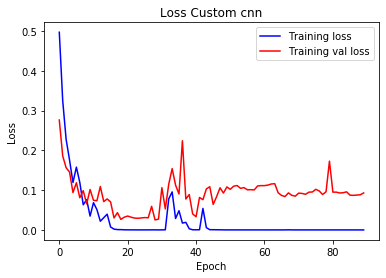

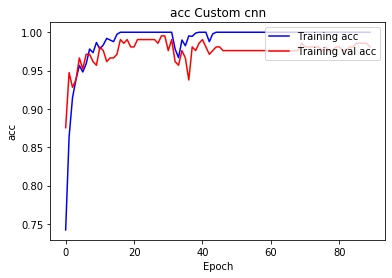

------------
MODEL RESULTS Custom cnn: 
232/232 [==============================] - 0s 787us/sample - loss: 0.1335 - acc: 0.9828
Test loss: 0.13353532711401636
Test accuracy: 0.98275864
(0.13353532711401636, 0.98275864)
------------


In [92]:
model_custom_cnn = DeepCnnModel(custom_cnn_config) 
evaluator_custom_cnn = train_and_evaluate_model(custom_cnn_config,model_custom_cnn,get_train_data_cnn(),get_test_data_cnn(),"Custom cnn")

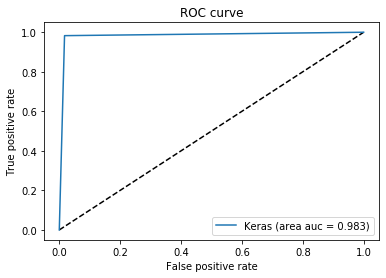

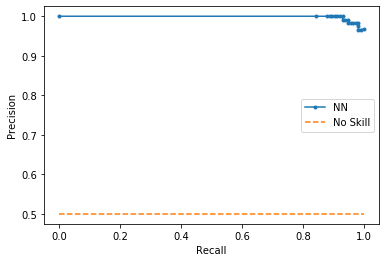

In [93]:
evaluator_custom_cnn.plot_roc_curve()
evaluator_custom_cnn.plot_precision_recall()

We can see that the custom model reaches a good accuracy and generalizes well

<img src="experiments/custom_cnn/images/general.png"
alt="Tensor board results">
<img src="experiments/custom_cnn/images/accuracy.png"
alt="Epcho acc">
<img src="experiments/custom_cnn/images/loss.png"
alt="Epcho acc">